# Bank Churn Prediction
## Steps

#### 1. Load and Explore Data
- 1.1. Import necessary libraries
- 1.2. Load the dataset
- 1.3. Check the shape of the dataset, duplicated rows, statistics summary
- 1.4. Assess data quality: datatypes, number and % of unique values and missing values
- 1.5. Identify categorical variables from numerical formats (less than 20 unique values)

#### 2. Data cleaning 
- 2.1. Dealing with Duplicates.
- 2.2. Standardize Column Names: Remove leading and trailing spaces and underscores. Replace non-alphanumeric characters with underscores. Convert column names from CamelCase to snake_case
- 2.3. Data Types Correction
- 2.4. Check Domain-Specific Inconsistencies:Check for inconsistencies or errors specific to the domain (e.g., unrealistic values, mismatches in categorical data).

#### 3. Univariate Analysis
- 3.1. Separate categorical and numerical columns
- 3.2. Categorical variables. Frequency tables: counts and proportions
- 3.3. Categorical variables. Barplots
- 3.4. Categorical variables. Pie charts

#### 4. Bivariate Analysis
- 4.1. Categorical (including Discrete Numerical) vs Categorical
  - 4.1.1. Crosstab
  - 4.1.2.Chi-square tests, Cramér's V. Test the independence of variables
  - 4.1.3. Visualization:
    - 4.1.3.1. Stacked or grouped bar charts
    - 4.1.3.2. Frequency heat maps
  - 4.1.3. Summary for Categorical vs Categorical Analysis

- 4.2. Categorical vs Continuous
  - 4.2.1. Visualization:
    - 4.2.1.1. Violin Plots
    - 4.2.1.2. Bar Charts
    - 4.2.1.3. Side by side Box Plots
  
- 4.3. Continuous vs Continuous
  - 4.3.1. Correlation coefficients
  - 4.3.2. Visualization:
    - 4.3.2.1. Scatter plots
    - 4.3.2.2. Line plots
    - 4.3.2.3. Correlation Heatmaps
    - 4.3.2.4. QQ Plot
- 4.4. Bivariate Analysis Summary. 


#### 5. Feature Engineering 
- 5.1. Create new features:categorization for credit score
- 5.2. Encode categorical variables 'Geography' and 'gender"
- 5.3. Check and Remove highly correlated variables:(Pearson correlation coefficient > 0.8).there is no
- 5.4. Log transformation of the 'age' feature
- 5.5. Assemble the final dataset (ABT)

#### 6. Model Building and evaluation
- 6.1. Feature selection
- 6.2. Data Splitting into training and testing sets
- 6.3. Define futures importance
- 6.4. Build and evaluate 5 Models No-Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network 
- 6.5. Hyperparametres tuning for 5 Models No-Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network 
- 6.6. Build and evaluate 5 Models With Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network
- 6.7. Hyperparameters Tuning 5 Models with Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network
- 6.8. Plot ROC AUC curve
- 6.9. Save and Verify the Trained Model


---

# Project

## 1. Load and Explore Data
- 1.1. Import necessary libraries
- 1.2. Load the dataset
- 1.3. Check the shape of the dataset, duplicated rows, statistics summary
- 1.4. Assess data quality: datatypes, number and % of unique values and missing values
- 1.5. Identify categorical variables from numerical formats (less than 20 unique values)

In [116]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import plotly.express as px
import re
import statsmodels.api as sm
import scipy.stats as stats
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, validation_curve, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from numpy import log1p  # This is used for log transformation
from scipy.stats.contingency import association, chi2_contingency
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve, make_scorer, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_class_weight

In [77]:
# Function to load_and_analyze_data
def load_and_analyze_data(file_path):
    # 1.2. Load the dataset
    df = pd.read_csv(file_path)
    
    # 1.3. Check the shape of the dataset, duplicated rows, statistics summary
    def initial_data_checking(df):
        # Print the shape of the DataFrame (number of rows and columns)
        print(f"1. Shape of the DataFrame: {df.shape}")

        # Print the count of duplicate rows
        print(f"2. Duplicate Rows Number: {df.duplicated().sum()}")

        # Print summary statistics for numerical columns
        print("3. Summary Statistics:")
        return pd.DataFrame(df.describe())
    
    initial_check_summary = initial_data_checking(df)
    print(initial_check_summary)  # Print summary statistics

    # 1.4. Assess data quality: datatypes, number and % of unique values and missing values
    def unique_and_missing_values_dtype(df):
        # Non-null counts and data types
        non_null_counts = df.notnull().sum()
        dtypes = df.dtypes

        # Count of unique values
        unique_count = df.nunique()

        # Percentage of unique values
        unique_percentage = (df.nunique() / len(df)) * 100

        # Count of missing values
        missing_count = df.isnull().sum()

        # Percentage of missing values
        missing_percentage = df.isnull().mean() * 100

        # Combine into a DataFrame
        summary = pd.DataFrame({
            'non-Null_count': non_null_counts,
            'dtype': dtypes,
            'unique_values': unique_count,
            '%_unique': unique_percentage.round(2).astype(str) + '%',
            'missing_values': missing_count,
            '%_missing': missing_percentage.round(2).astype(str) + '%'
        })

        return summary
    
    data_quality_summary = unique_and_missing_values_dtype(df)
    print("\n4. Data Quality Summary:")
    print(data_quality_summary)  # Print data quality summary
    
    # 1.5. Identify categorical variables from numerical formats (less than 20 unique values)
    potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
    print("\n5. Potential Categorical Variables from Numerical Columns:")
    print(potential_categorical_from_numerical.head())  # Print potential categorical variables
    
    return df, initial_check_summary, data_quality_summary, potential_categorical_from_numerical

# Raw file URL
df, initial_check_summary, data_quality_summary, potential_categorical_from_numerical = load_and_analyze_data('https://raw.githubusercontent.com/NGravereaux/bank_churn_streamlit/main/bank_churn_prediction_modeling.csv')


1. Shape of the DataFrame: (10002, 14)
2. Duplicate Rows Number: 2
3. Summary Statistics:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10002.000000  1.000200e+04  10002.000000  10001.000000  10002.000000   
mean    5001.499600  1.569093e+07    650.555089     38.922311      5.012498   
std     2887.472338  7.193177e+04     96.661615     10.487200      2.891973   
min        1.000000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2501.250000  1.562852e+07    584.000000     32.000000      3.000000   
50%     5001.500000  1.569073e+07    652.000000     37.000000      5.000000   
75%     7501.750000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.000000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   10002.000000   10002.000000  10001.000000    10001.000000   
mean    76491.112875       1.530194      0.705529        0.5

## 2. Data cleaning 
- 2.1. Dealing with Duplicates.
- 2.2. Standardize Column Names: Remove leading and trailing spaces and underscores. Replace non-alphanumeric characters with underscores. Convert column names from CamelCase to snake_case
- 2.3. Data Types Correction
- 2.4. Check Domain-Specific Inconsistencies:Check for inconsistencies or errors specific to the domain (e.g., unrealistic values, mismatches in categorical data).

In [78]:
# Function to clean and format the DataFrame
def clean_and_format_dataframe(df, integer_columns):
    # 2.1. Delete Duplicates
    initial_row_count = df.shape[0]
    df.dropna(inplace=True)
    final_row_count = df.shape[0]
    print(f"2.1.Deleted {initial_row_count - final_row_count} "f"duplicate/missing rows.")

    # 2.2. Standardize Column Names
    def clean_column(name):
        # Convert camel case to snake case
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        name = name.strip()  # Remove leading and trailing spaces
        # Replace non-alphanumeric characters with underscores
        name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        name = name.lower()  # Convert to lowercase
        return name.strip('_')  # Remove leading and trailing underscores

    df.columns = [clean_column(col) for col in df.columns]
    print(f"2.2.Standardized column names: {df.columns.tolist()}")

    # 2.3. Data Types Correction
    def convert_float_to_integer(df, columns):
        for column in columns:
            df[column] = df[column].astype(int)
        return df

    df_cleaned = convert_float_to_integer(df, integer_columns)
    print(f"2.3.Converted columns to integer: {integer_columns}")

    # Export cleaned dataset
    df_cleaned_path = './df_cleaned.csv'
    df.to_csv(df_cleaned_path, index=False)
    print(df_cleaned.head())

    return df_cleaned, df_cleaned_path

# Example usage
df_cleaned, df_cleaned_path = clean_and_format_dataframe(df, ['age', 'balance', 'has_cr_card', 'is_active_member', 'estimated_salary'])


2.1.Deleted 4 duplicate/missing rows.
2.2.Standardized column names: ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']
2.3.Converted columns to integer: ['age', 'balance', 'has_cr_card', 'is_active_member', 'estimated_salary']
   row_number  customer_id   surname  credit_score geography  gender  age  \
0           1     15634602  Hargrave           619    France  Female   42   
1           2     15647311      Hill           608     Spain  Female   41   
2           3     15619304      Onio           502    France  Female   42   
3           4     15701354      Boni           699    France  Female   39   
5           6     15574012       Chu           645     Spain    Male   44   

   tenure  balance  num_of_products  has_cr_card  is_active_member  \
0       2        0                1            1                 1   
1       1    83807          

## 3. Univariate Analysis
- 3.1. Separate categorical and numerical columns
- 3.2. Categorical variables. Frequency tables: counts and proportions
- 3.3. Categorical variables. Barplots
- 3.4. Categorical variables. Pie charts

3.1. Categorical Variables: Index(['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card',
       'is_active_member', 'exited'],
      dtype='object').
Numerical Variables: Index(['credit_score', 'age', 'balance', 'estimated_salary'], dtype='object').

3.2. Frequency and Proportion Tables for Categorical Variables:

geography:
           Frequency  Proportion
geography                       
France          5012        0.50
Germany         2510        0.25
Spain           2476        0.25

gender:
        Frequency  Proportion
gender                       
Male         5455        0.55
Female       4543        0.45

tenure:
        Frequency  Proportion
tenure                       
2            1046        0.10
1            1035        0.10
7            1027        0.10
8            1025        0.10
5            1012        0.10
3            1010        0.10
4             989        0.10
9             984        0.10
6             967        0.10
10            490        0.

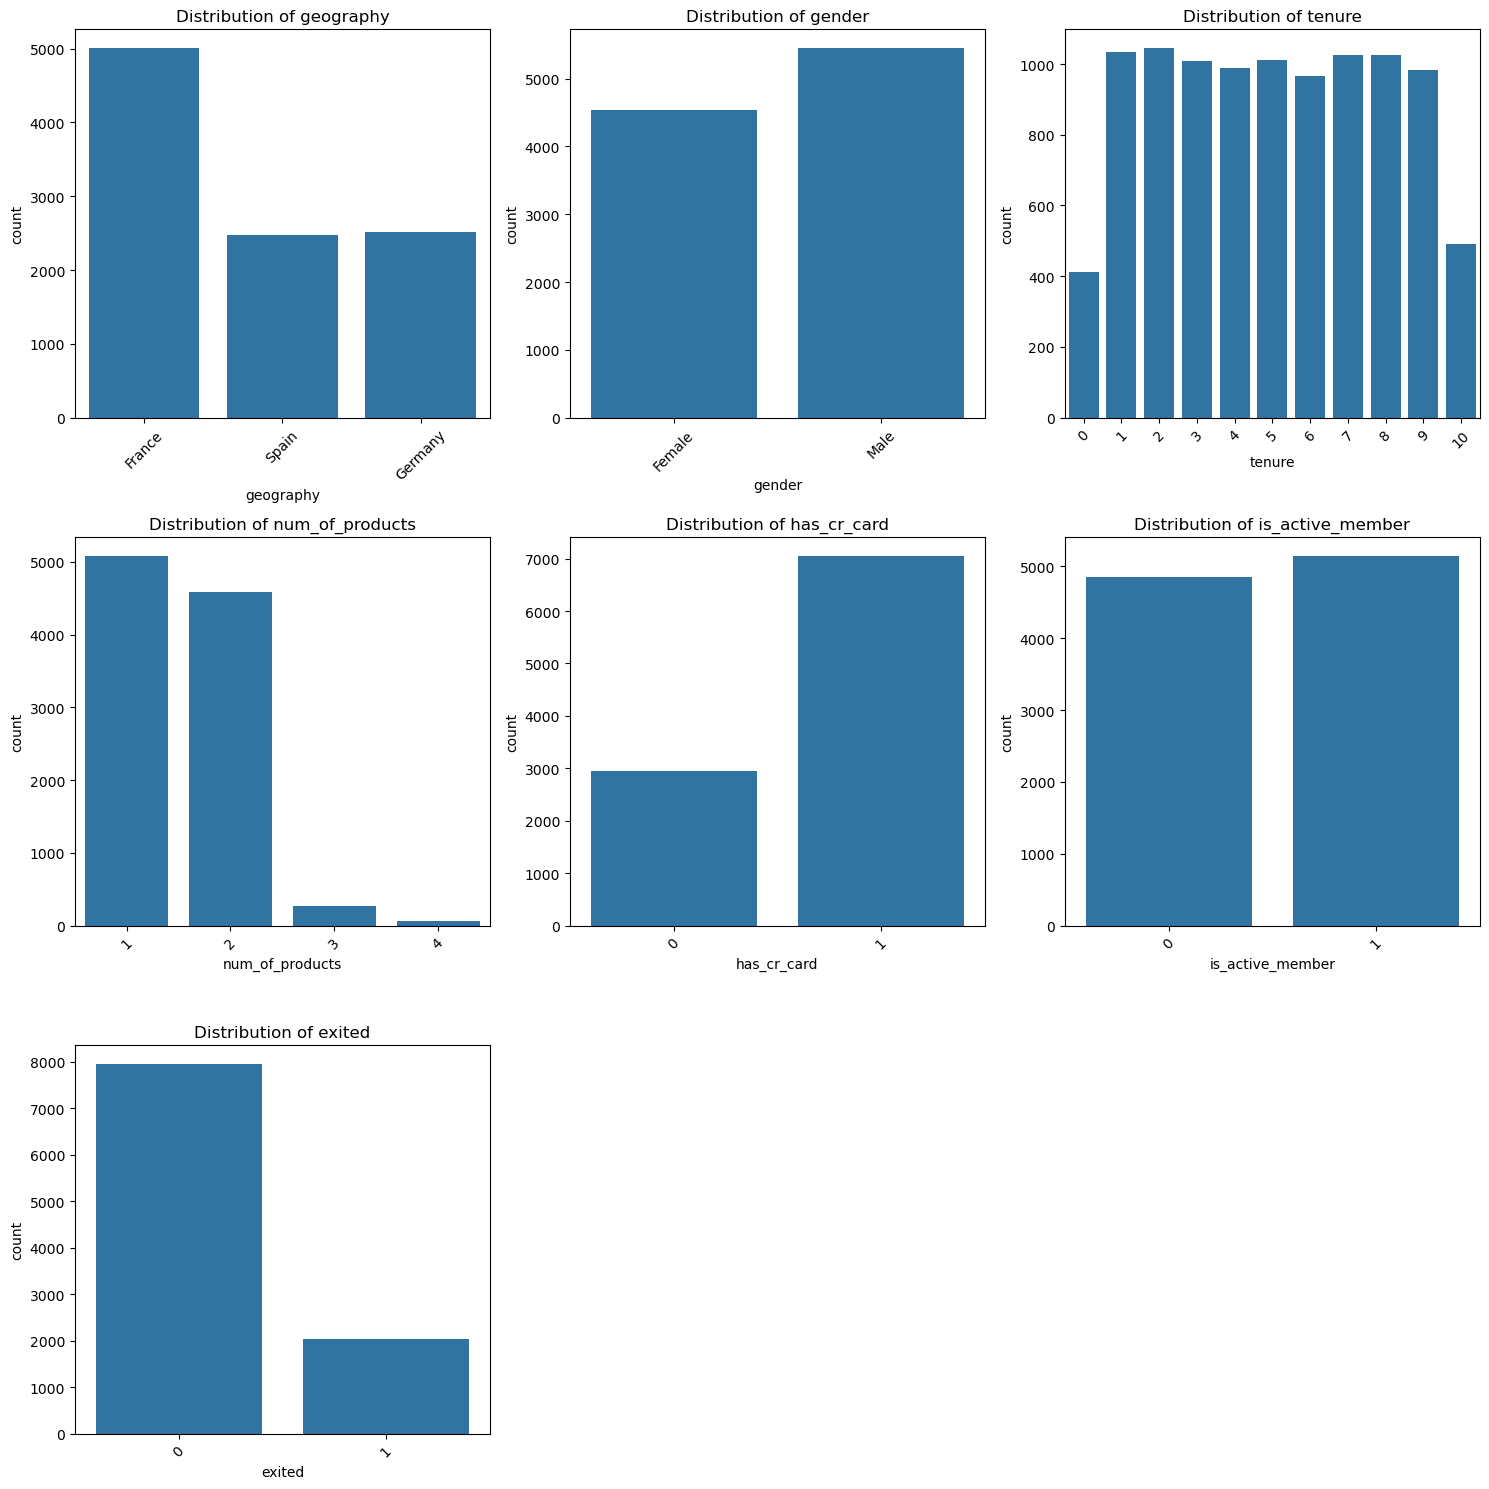


3.4. Plot Categorical Pie_charts:



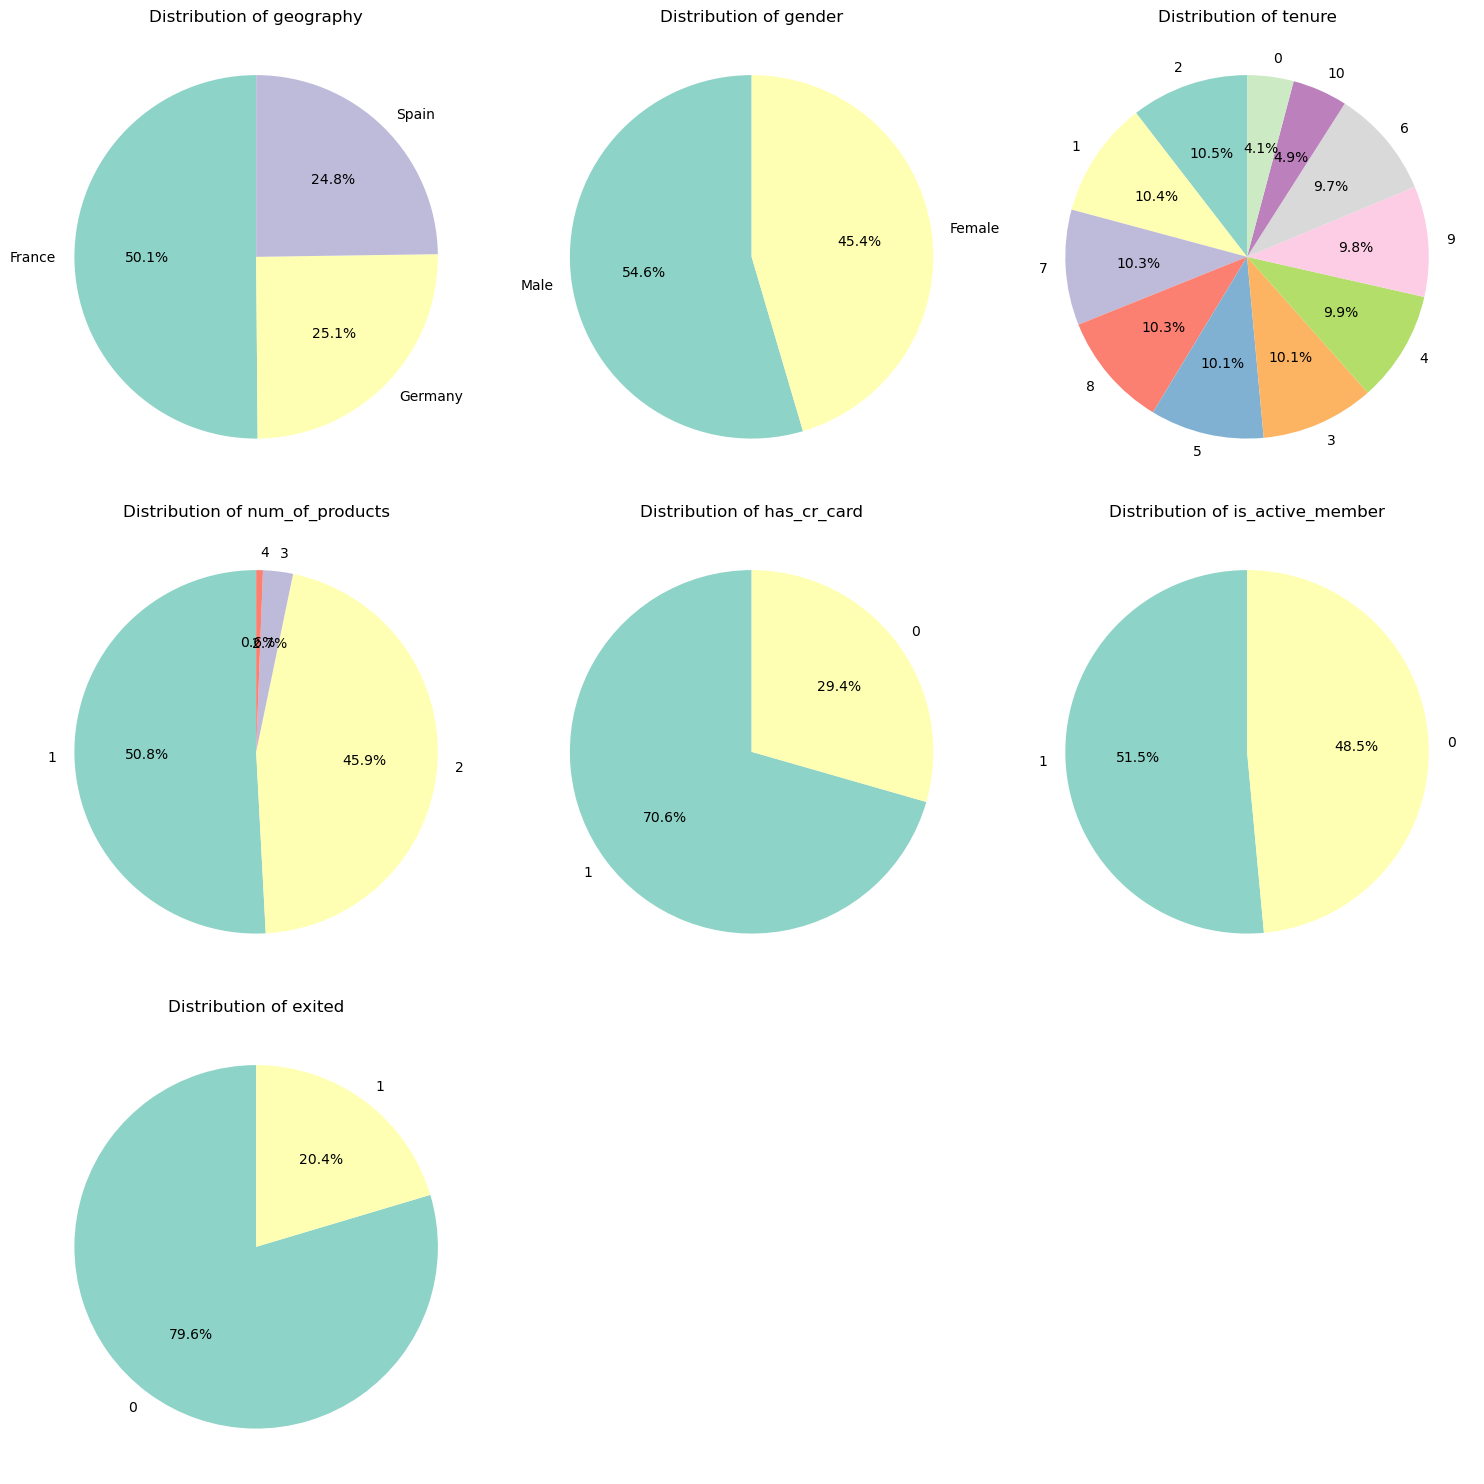


3.5. Summary Statistics for Numerical Variables:

       credit_score          age        balance  estimated_salary
count   9998.000000  9998.000000    9998.000000       9998.000000
mean     650.529606    38.920184   76481.173035     100099.294959
std       96.633003    10.488004   62392.966945      57510.938172
min      350.000000    18.000000       0.000000         11.000000
25%      584.000000    32.000000       0.000000      50983.250000
50%      652.000000    37.000000   97172.500000     100218.000000
75%      718.000000    44.000000  127641.000000     149395.250000
max      850.000000    92.000000  250898.000000     199992.000000

3.6. Skewness and Kurtosis for Numerical Variables:

             Column  Skewness  Kurtosis
0      credit_score     -0.07     -0.43
1               age      1.01      1.40
2           balance     -0.14     -1.49
3  estimated_salary      0.00     -1.18

3.7. Plot Histograms for Numerical Variables:



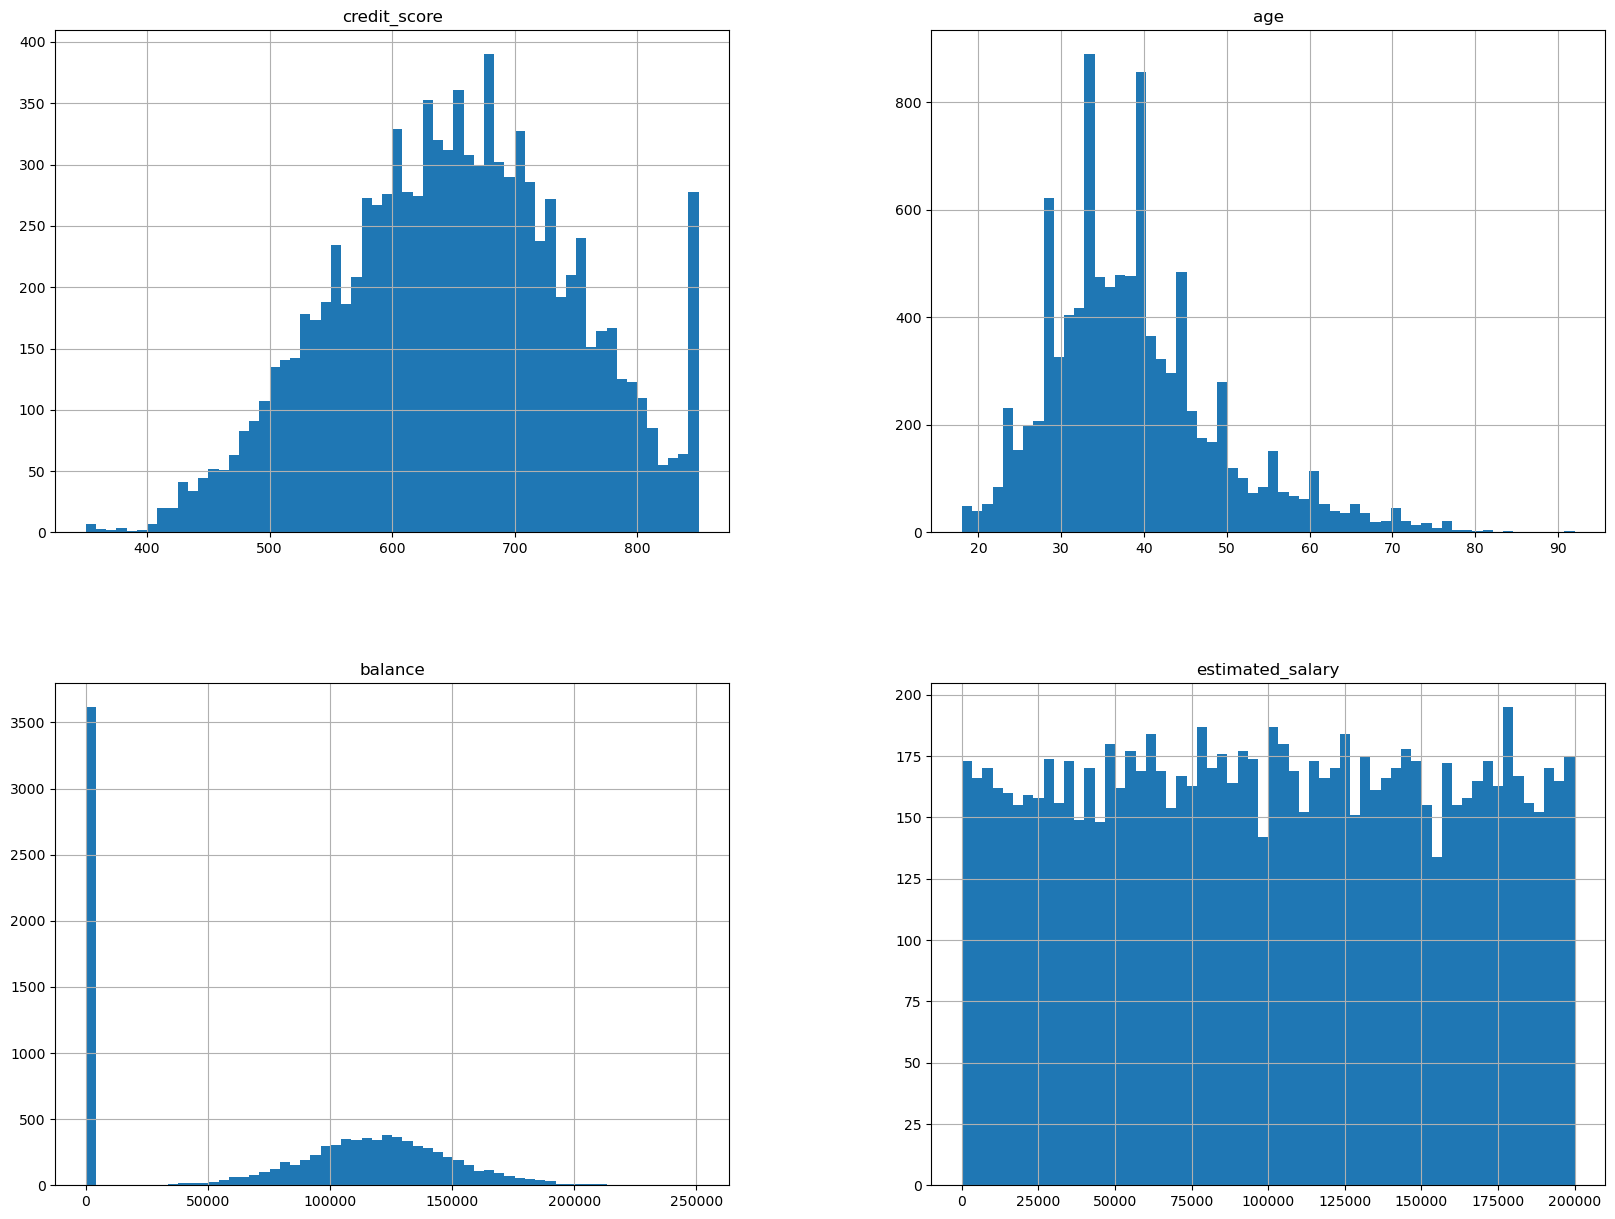


3.8. Plot Boxplots:



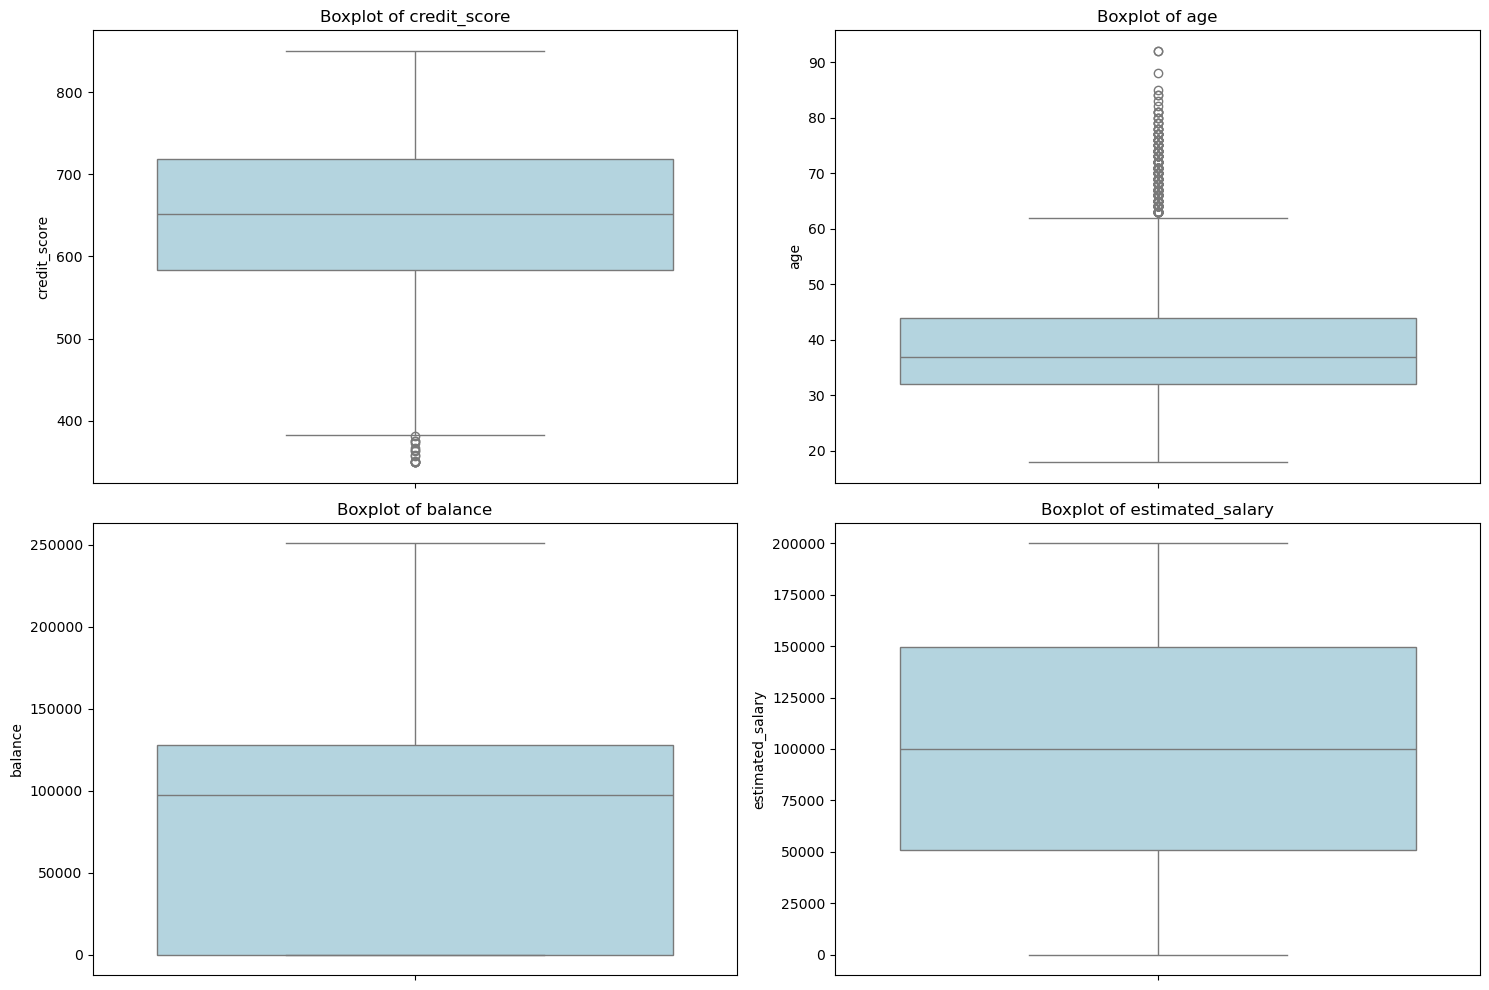

In [79]:
# Function for Univariate Analysis
def univariate_analysis(df):
    # 3.1. Separate categorical and numerical columns
    df_categorical = df[['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member', 'exited']]
    df_numerical = df[['credit_score', 'age', 'balance', 'estimated_salary']]
    
    # 3.2. Categorical variables. Frequency tables: counts and proportions
    def generate_frequency_proportion_tables(df_categorical):
        frequency_proportion_results = {}
        
        for col in df_categorical.columns:
            # Calculate frequency and proportion
            frequency = df_categorical[col].value_counts()
            proportion = df_categorical[col].value_counts(normalize=True).round(2)
            
            # Combine into a single DataFrame
            result_table = pd.DataFrame({
                'Frequency': frequency,
                'Proportion': proportion
            })
            
            # Add the result to the dictionary
            frequency_proportion_results[col] = result_table
        
        return frequency_proportion_results

    # 3.3. Categorical variables. Barplots
    def plot_categorical_barplots(df_categorical):
        num_cols = 3
        num_plots = len(df_categorical.columns)
        num_rows = math.ceil(num_plots / num_cols)
        
        plt.figure(figsize=(num_cols * 5, num_rows * 5))
        
        for i, col in enumerate(df_categorical.columns):
            plt.subplot(num_rows, num_cols, i + 1)
            sns.countplot(data=df_categorical, x=col)
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
   
    # 3.4. Categorical variables. Pie charts
    def plot_categorical_pie_charts(df_categorical):
        num_cols = 3
        num_plots = len(df_categorical.columns)
        num_rows = math.ceil(num_plots / num_cols)
        
        plt.figure(figsize=(num_cols * 5, num_rows * 5))
        
        for i, col in enumerate(df_categorical.columns):
            plt.subplot(num_rows, num_cols, i + 1)
            df_categorical[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"), startangle=90)
            plt.title(f'Distribution of {col}')
            plt.ylabel('')  # Hide the y-label for better aesthetics
        
        plt.tight_layout()
        plt.show()

    # 3.5. Numerical variables. Summary Statistics
    def summary_statistics(df_numerical):
        return pd.DataFrame(df_numerical.describe())
    
    # 3.6. Numerical variables. Shape of the distribution: Skewness and Kurtosis
    def calculate_skewness_kurtosis(df_numerical):
        results = {'Column': [], 'Skewness': [], 'Kurtosis': []}
        
        for column in df_numerical.columns:
            skewness = round(df_numerical[column].skew(), 2)
            kurtosis = round(df_numerical[column].kurtosis(), 2)
            
            results['Column'].append(column)
            results['Skewness'].append(skewness)
            results['Kurtosis'].append(kurtosis)
        
        return pd.DataFrame(results)

    # 3.2.4. Visualizations: Histograms and Box plots
    def plot_histograms(df_numerical):
        df_numerical.hist(figsize=(20, 15), bins=60, xlabelsize=10, ylabelsize=10)
        plt.show()

    def plot_boxplots(df_numerical):
        num_cols = 2
        num_rows = math.ceil(len(df_numerical.columns) / num_cols)
        
        plt.figure(figsize=(15, num_rows * 5))
        
        for i, column in enumerate(df_numerical.columns):
            plt.subplot(num_rows, num_cols, i + 1)
            sns.boxplot(data=df_numerical[column], color="lightblue")
            plt.title(f'Boxplot of {column}')
        
        plt.tight_layout()
        plt.show()

    # Call all functions
    print(f"3.1. Categorical Variables: {df_categorical.columns}.")
    print(f"Numerical Variables: {df_numerical.columns}.")
    
    frequency_proportion_tables = generate_frequency_proportion_tables(df_categorical)
    print("\n3.2. Frequency and Proportion Tables for Categorical Variables:\n")
    for col, table in frequency_proportion_tables.items():
        print(f"{col}:\n{table}\n")

    print("\n3.3. Plot Categorical Barplots:\n")
    plot_categorical_barplots(df_categorical)
    
    print("\n3.4. Plot Categorical Pie_charts:\n")
    plot_categorical_pie_charts(df_categorical)
    
    print("\n3.5. Summary Statistics for Numerical Variables:\n")
    summary_stats = summary_statistics(df_numerical)
    print(summary_stats)

    print("\n3.6. Skewness and Kurtosis for Numerical Variables:\n")
    skewness_kurtosis = calculate_skewness_kurtosis(df_numerical)
    print(skewness_kurtosis)

    print("\n3.7. Plot Histograms for Numerical Variables:\n")
    plot_histograms(df_numerical)
    
    print("\n3.8. Plot Boxplots:\n")
    plot_boxplots(df_numerical)

univariate_analysis(df)


**Inference from frequency_proportion_results**
- Geography:  France has the largest customer base (50%), with Germany and Spain equally represented (25% each).
- Gender: The customer base is slightly male-dominated (55% male, 45% female).
- Tenure: Tenure is evenly spread across the first nine years, with fewer customers at 10 years (5%) and New customers (4%).
- Number of Products: Most customers use 1 or 2 products (96%), with very few using 3 or 4 products. (4%)
- Has Credit Card: The majority of customers (71%) have a credit card.
- Is Active Member: The customer base is evenly split between active (51%) and inactive (49%) members.

- Exited: Most customers have not churned (80%), exited (20%).

**Inference from Summary Statistics**
- Balance: The minimum value for the balance column is 0.0, but the 25th percentile is also 0.0. This suggests that at least 25% of the customers have a zero balance, which could indicate that a significant portion of the customers do not use or have funds in their accounts.
- Estimated Salary: The estimated_salary column has a minimum value of 11.0, which is unusually low for a salary estimate. This could be a data entry error or an outlier. Additionally, the mean salary is 100,099.29, while the median (50th percentile) salary is 100,218.00, which suggests that the salary distribution is fairly symmetrical, but the low minimum value might still be an anomaly.

- Age: The range of age (minimum of 18 and maximum of 92) seems reasonable, but the mean age of around 39 might indicate a relatively younger customer base. 


**Interpretation of Shape of the distribution analysis**
1. **Skewness (shape of the distribution)**
 - Skewness = 0: Symmetrical distribution (No action needed).
 - Skewness > 0: Right-skewed (Consider log or square root transformation).
 - Skewness < 0: Left-skewed (Consider inverse or square transformation).
 - -0.5 to 0.5: Fairly symmetrical (Generally acceptable).
 - -1 to -0.5 or 0.5 to 1: Moderately skewed (Might require transformation).
 - <-1 or >1: Highly skewed (Transformation recommended).

2. **Kurtosis (outliers)**
 - Kurtosis = 3: Normal distribution (No action needed).
 - Kurtosis > 3: Heavy tails (Check for outliers, consider robust methods).
 - Kurtosis < 3: Light tails (Typically acceptable, fewer outliers).

## 4. Bivariate Analysis
- 4.1. Categorical (including Discrete Numerical) vs Categorical
  - 4.1.1. Chi-square test. Test the independence of variables
  - 4.1.2. Cramér's V. Test the independence of variables
  - 4.1.3. Visualization stacked bar. Analysis of proportional relationships between pairs of categorical
  - 4.1.4. Visualization Frequency heat maps. The density or count of occurrences for combinations of two categorical variables, with color intensity indicating the frequency of each combination

- 4.2. Categorical vs Continuous
  - 4.2.1. Violin Plots
  - 4.2.2. Bar Charts
  - 4.2.3. Side by side Box Plots
  
- 4.3. Continuous vs Continuous
  - 4.3.1. Pearson's Correlation coefficients
  - 4.3.2. Spearman's Correlation coefficients
  - 4.3.3. Scatter plots/ pairplots
  - 4.3.4. Correlation Heatmaps
  - 4.3.5. QQ Plot


#### 4.1. Categorical (including Discrete Numerical) vs Categorical

#### Chi-square test

Chi-square is a measure of statistical significance. It answers the question, “Is there a relationship between our dependent variable and our independent variable?” Cramer's V is a measure of substantive significance. It answers the question, “How strong does the relationship appear to be?”

In [80]:
df_categorical = df[['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member', 'exited']]
df_numerical = df[['credit_score', 'age', 'balance', 'estimated_salary']]

In [81]:
# 4.1.1. Chi-square tests: **determine whether there is a significant association between two categorical variables**  
#Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables. 
def calculate_and_sort_chi2_for_crosstabs(df):

    chi2_results = []

    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            crosstab_result = pd.crosstab(df[col1], df[col2])
            
            # Perform Chi-square test
            try:
                chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
                chi2_results.append(((col1, col2), chi2_statistic, chi2_p_value))
            
            except ValueError as e:
                print(f"Error calculating Chi-square for {col1} vs {col2}: {e}")
                chi2_results.append(((col1, col2), None, None))
    
    # Sort the results by p-value (third item in each tuple)
    sorted_chi2_results = sorted(chi2_results, key=lambda x: x[2])
    
    # Display sorted results
    for result in sorted_chi2_results:
        pair, chi2_statistic, p_value = result
        if p_value is not None:
            print(f"\nChi-square test for {pair[0]} vs {pair[1]}:")
            print(f"  Chi2 Statistic: {chi2_statistic:.4f}, P-Value: {p_value:.4f}")
        else:
            print(f"\nChi-square test for {pair[0]} vs {pair[1]}:")
            print("  Chi2 Statistic: None, P-Value: None (Error in calculation)")
    
    return sorted_chi2_results

sorted_chi2_results = calculate_and_sort_chi2_for_crosstabs(df_categorical)


Chi-square test for num_of_products vs exited:
  Chi2 Statistic: 1501.2784, P-Value: 0.0000

Chi-square test for geography vs exited:
  Chi2 Statistic: 301.9215, P-Value: 0.0000

Chi-square test for is_active_member vs exited:
  Chi2 Statistic: 242.7607, P-Value: 0.0000

Chi-square test for gender vs exited:
  Chi2 Statistic: 112.2028, P-Value: 0.0000

Chi-square test for geography vs num_of_products:
  Chi2 Statistic: 48.9848, P-Value: 0.0000

Chi-square test for tenure vs num_of_products:
  Chi2 Statistic: 68.3486, P-Value: 0.0001

Chi-square test for gender vs num_of_products:
  Chi2 Statistic: 20.4566, P-Value: 0.0001

Chi-square test for num_of_products vs is_active_member:
  Chi2 Statistic: 17.1142, P-Value: 0.0007

Chi-square test for geography vs tenure:
  Chi2 Statistic: 34.2298, P-Value: 0.0246

Chi-square test for gender vs is_active_member:
  Chi2 Statistic: 4.9304, P-Value: 0.0264

Chi-square test for geography vs gender:
  Chi2 Statistic: 6.8556, P-Value: 0.0325

Chi-squ

#### Inference from Chi-square test
- Num_of_products vs Exited: Chi2 = 1501.2784, P-Value = 0.0000 (correlation)
- Geography vs Exited: Chi2 = 301.9215, P-Value = 0.0000 (correlation)
- Is_active_member vs Exited: Chi2 = 242.7607, P-Value = 0.0000 (correlation)
- Gender vs Exited: Chi2 = 112.2028, P-Value = 0.0000 (correlation)
- Geography vs Num_of_products: Chi2 = 48.9848, P-Value = 0.0000 (correlation)
- Tenure vs Num_of_products: Chi2 = 68.3486, P-Value = 0.0001 (correlation)
- Gender vs Num_of_products: Chi2 = 20.4566, P-Value = 0.0001 (correlation)
- Num_of_products vs Is_active_member: Chi2 = 17.1142, P-Value = 0.0007 (correlation)
- Geography vs Tenure: Chi2 = 34.2298, P-Value = 0.0246 (correlation)
- Gender vs Is_active_member: Chi2 = 4.9304, P-Value = 0.0264 (correlation)
- Geography vs Gender: Chi2 = 6.8556, P-Value = 0.0325 (correlation)
  

#### Cramer's test

In [82]:
# 4.1.2.  Cramér's V. Test the independence of variables
#- Cramer's V is a measure of association used to **quantify the strength of the relationship between categorical variables**. 
#- Interpretation: Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.
# Computing the association between variables in 'crosstab_result' using the "cramer" method
def calculate_cramers_v_for_all_pairs(df):
    """
    Calculates Cramér's V for the association between all unique pairs of categorical columns in the DataFrame,
    and sorts the results by the Cramér's V value.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        list: A sorted list of tuples where each tuple contains the column pair and the corresponding Cramér's V value.
    """
    
    def cramers_v(crosstab):
        """Calculate Cramér's V statistic for a crosstab."""
        chi2_statistic, _, _, _ = chi2_contingency(crosstab)
        n = crosstab.sum().sum()
        phi2 = chi2_statistic / n
        r, k = crosstab.shape
        return np.sqrt(phi2 / min(k-1, r-1))
    
    cramers_v_results = []

    # Iterate over all unique pairs of columns in the DataFrame
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            crosstab_result = pd.crosstab(df[col1], df[col2])
            cramers_v_value = cramers_v(crosstab_result)
            cramers_v_results.append(((col1, col2), cramers_v_value))
    
    # Sort the results by Cramér's V value in descending order
    sorted_cramers_v_results = sorted(cramers_v_results, key=lambda x: x[1], reverse=True)
    
    # Print the sorted results
    for pair, value in sorted_cramers_v_results:
        print(f"Cramér's V for {pair[0]} vs {pair[1]}: {value:.4f}")
    
    return sorted_cramers_v_results

# Example usage with your DataFrame
cramers_v_results = calculate_cramers_v_for_all_pairs(df_categorical)


Cramér's V for num_of_products vs exited: 0.3875
Cramér's V for geography vs exited: 0.1738
Cramér's V for is_active_member vs exited: 0.1558
Cramér's V for gender vs exited: 0.1059
Cramér's V for geography vs num_of_products: 0.0495
Cramér's V for tenure vs num_of_products: 0.0477
Cramér's V for gender vs num_of_products: 0.0452
Cramér's V for geography vs tenure: 0.0414
Cramér's V for num_of_products vs is_active_member: 0.0414
Cramér's V for tenure vs has_cr_card: 0.0411
Cramér's V for gender vs tenure: 0.0405
Cramér's V for tenure vs is_active_member: 0.0373
Cramér's V for tenure vs exited: 0.0372
Cramér's V for geography vs gender: 0.0262
Cramér's V for geography vs is_active_member: 0.0230
Cramér's V for gender vs is_active_member: 0.0222
Cramér's V for geography vs has_cr_card: 0.0151
Cramér's V for has_cr_card vs is_active_member: 0.0118
Cramér's V for has_cr_card vs exited: 0.0068
Cramér's V for num_of_products vs has_cr_card: 0.0063
Cramér's V for gender vs has_cr_card: 0.005

#### Inference from Cramér's V tests

- **Num_of_products vs Exited**: Cramér's V = 0.3875 (Moderate association)
- **Geography vs Exited**: Cramér's V = 0.1738 (Weak association)
- **Is_active_member vs Exited**: Cramér's V = 0.1558 (Weak association)
- **Gender vs Exited**: Cramér's V = 0.1059 (Weak association)

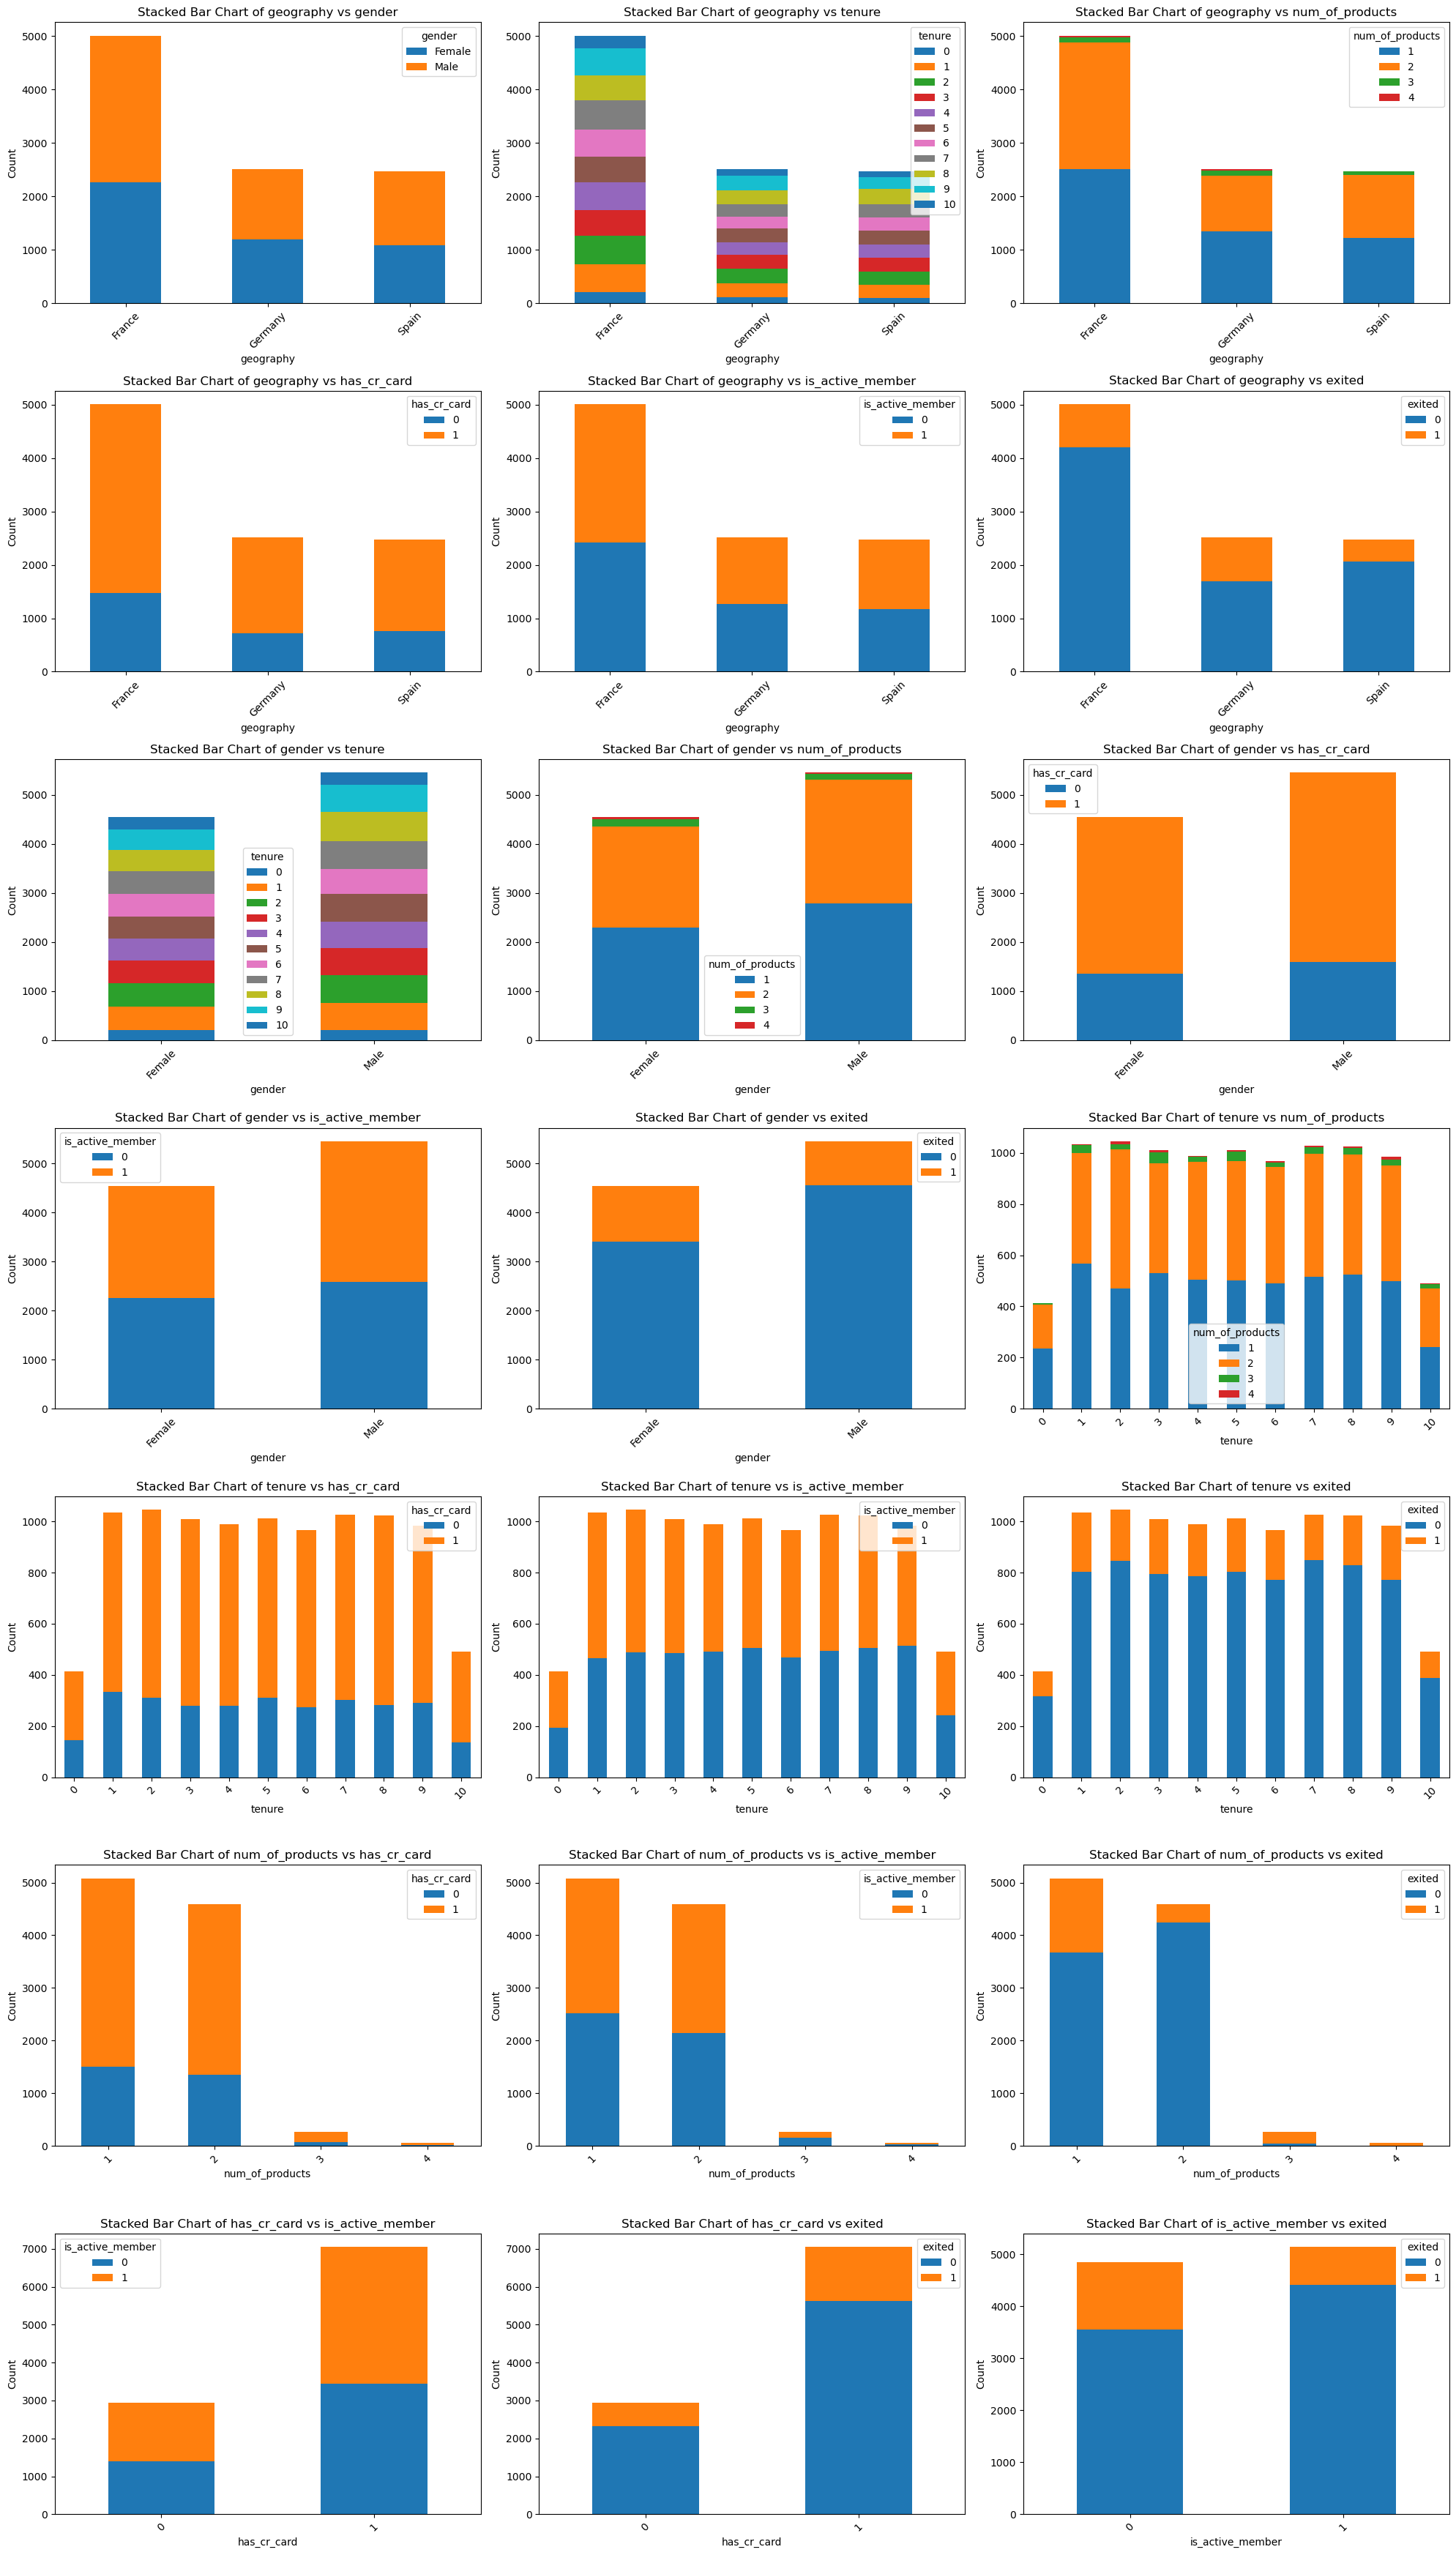

In [83]:
# 4.1.3. Visualization stacked bar
# Plotting a stacked bar chart to analyse proportional relationships between pairs of categorical variables
def plot_stacked_bar_charts_for_all_pairs(df):
    """
    Generates stacked bar charts for the crosstabs of all unique pairs of columns in the DataFrame,
    excluding self-pairs and duplicate pairs. Displays 3 stacked bar charts per row.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    num_plots = len(df.columns) * (len(df.columns) - 1) // 2
    num_cols = 3
    num_rows = (num_plots // num_cols) + int(num_plots % num_cols != 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

    # Flatten axes if necessary (handles cases where only 1 row or column)
    axes = axes.flatten() if num_rows > 1 else [axes]

    plot_idx = 0
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            ax = axes[plot_idx]
            crosstab_result = pd.crosstab(df[col1], df[col2])
            crosstab_result.plot(kind="bar", stacked=True, ax=ax)
            ax.set_title(f'Stacked Bar Chart of {col1} vs {col2}')
            ax.set_xlabel(col1)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)
            plot_idx += 1

    # Hide any unused subplots
    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_stacked_bar_charts_for_all_pairs(df_categorical)

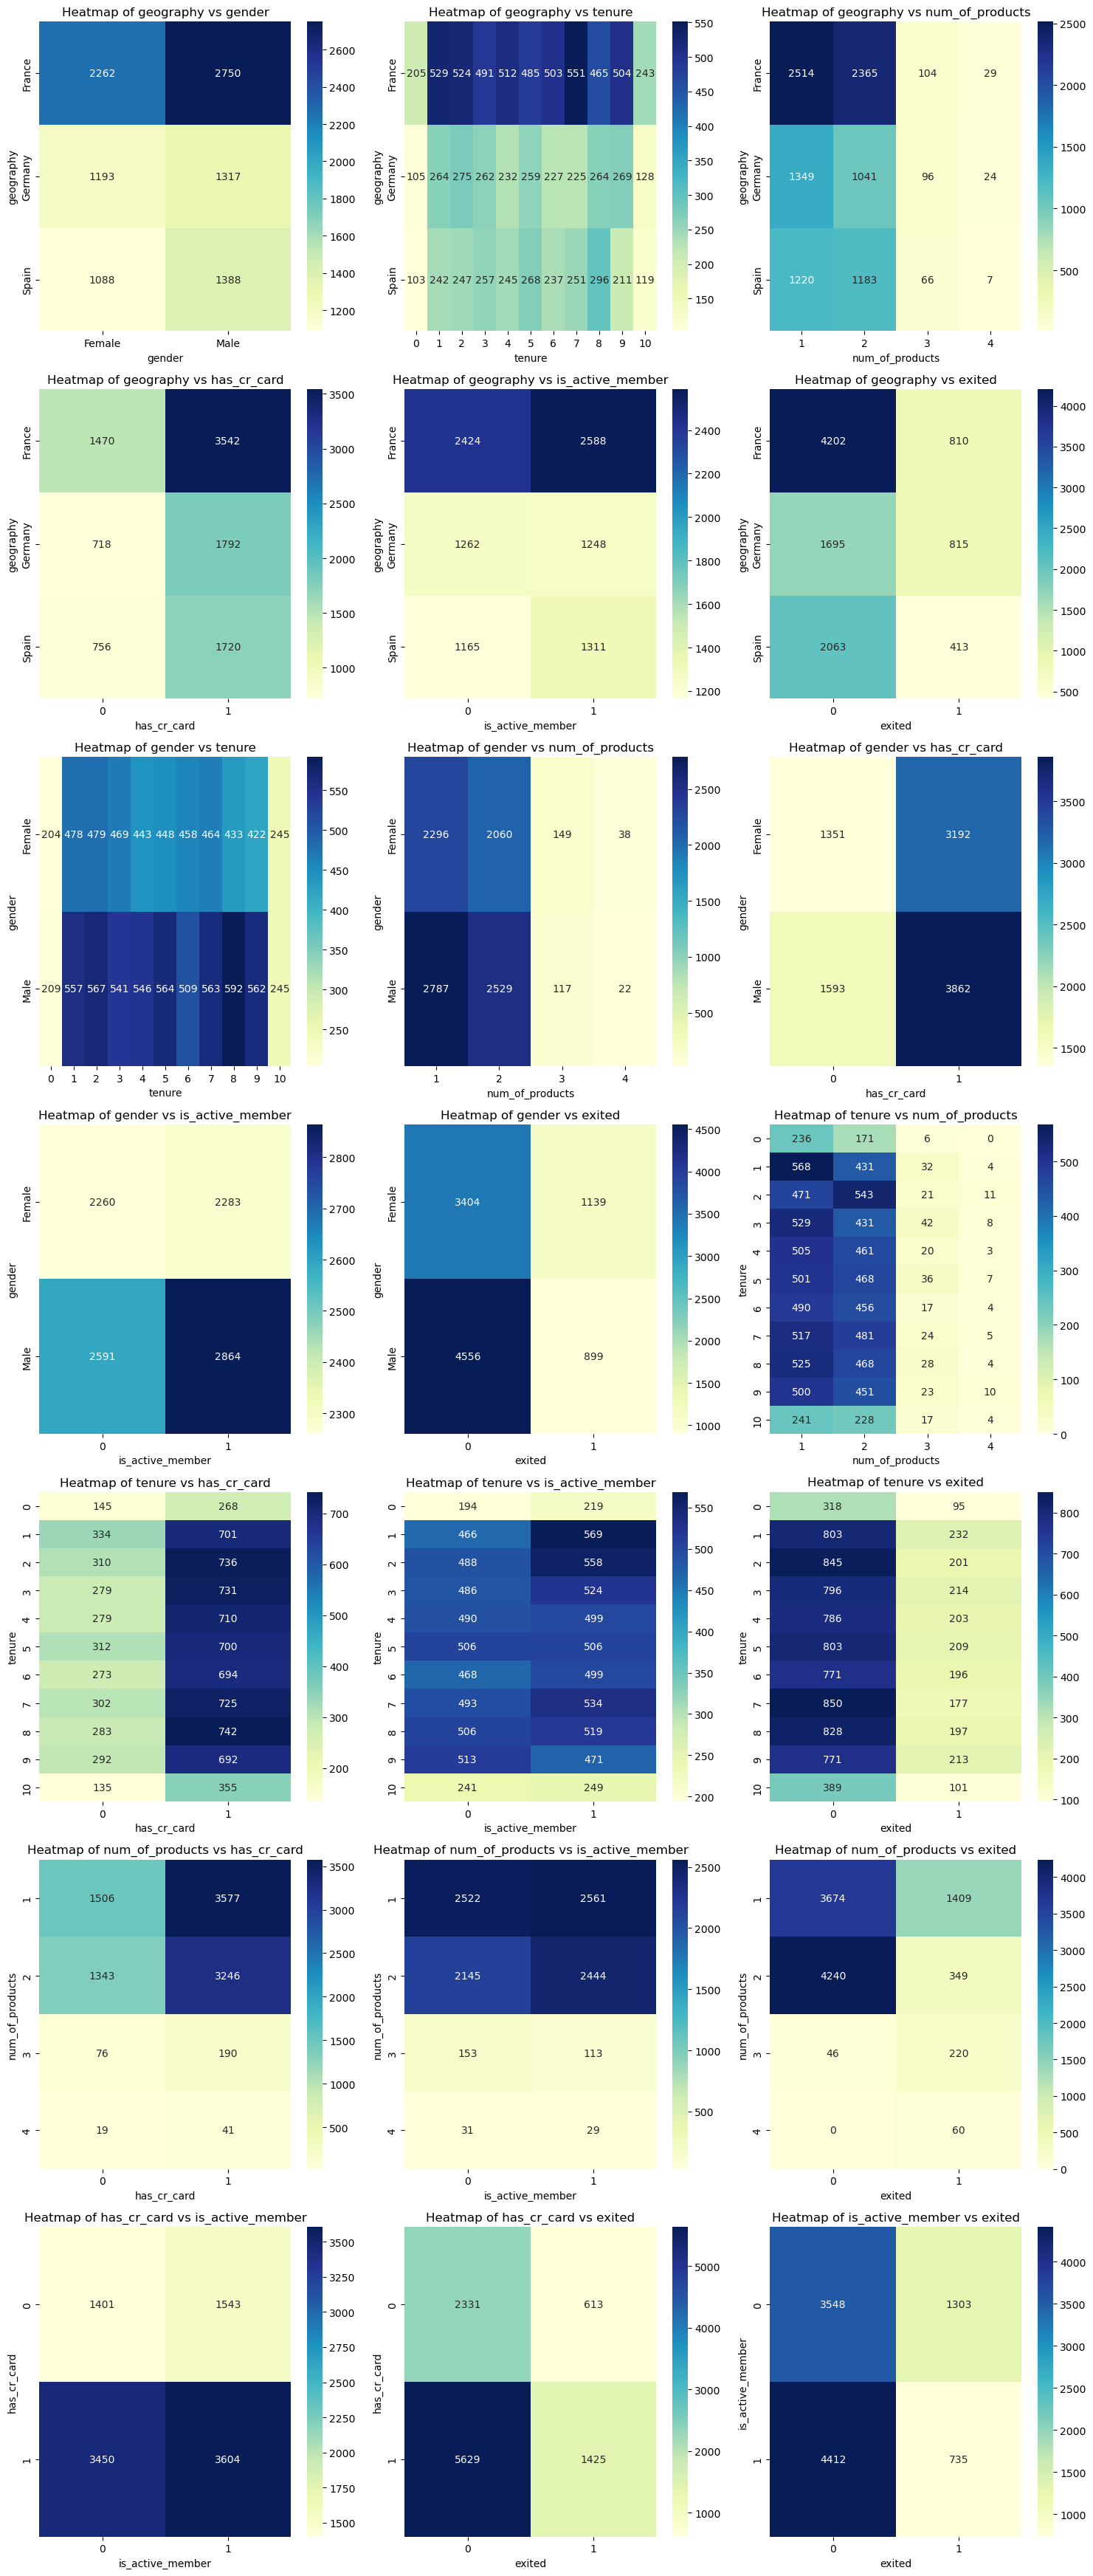

In [84]:
# 4.1.4. Visualization Frequency heat maps
#visualizes the density or count of occurrences for combinations of two categorical variables, with color intensity indicating the frequency of each combination#

def plot_heatmaps_for_all_pairs(df):
    """
    Generates heatmaps for the crosstabs of all unique pairs of columns in the DataFrame,
    excluding self-pairs and duplicate pairs. Displays 3 heatmaps per row.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    num_plots = len(df.columns) * (len(df.columns) - 1) // 2
    num_cols = 3
    num_rows = (num_plots // num_cols) + int(num_plots % num_cols != 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

    # Flatten axes if necessary (handles cases where only 1 row or column)
    axes = axes.flatten() if num_rows > 1 else [axes]

    plot_idx = 0
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            ax = axes[plot_idx]
            crosstab_result = pd.crosstab(df[col1], df[col2])
            sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d", ax=ax)
            ax.set_title(f'Heatmap of {col1} vs {col2}')
            plot_idx += 1

    # Hide any unused subplots
    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_heatmaps_for_all_pairs(df_categorical)

#### 4.2. Categorical vs Continuous

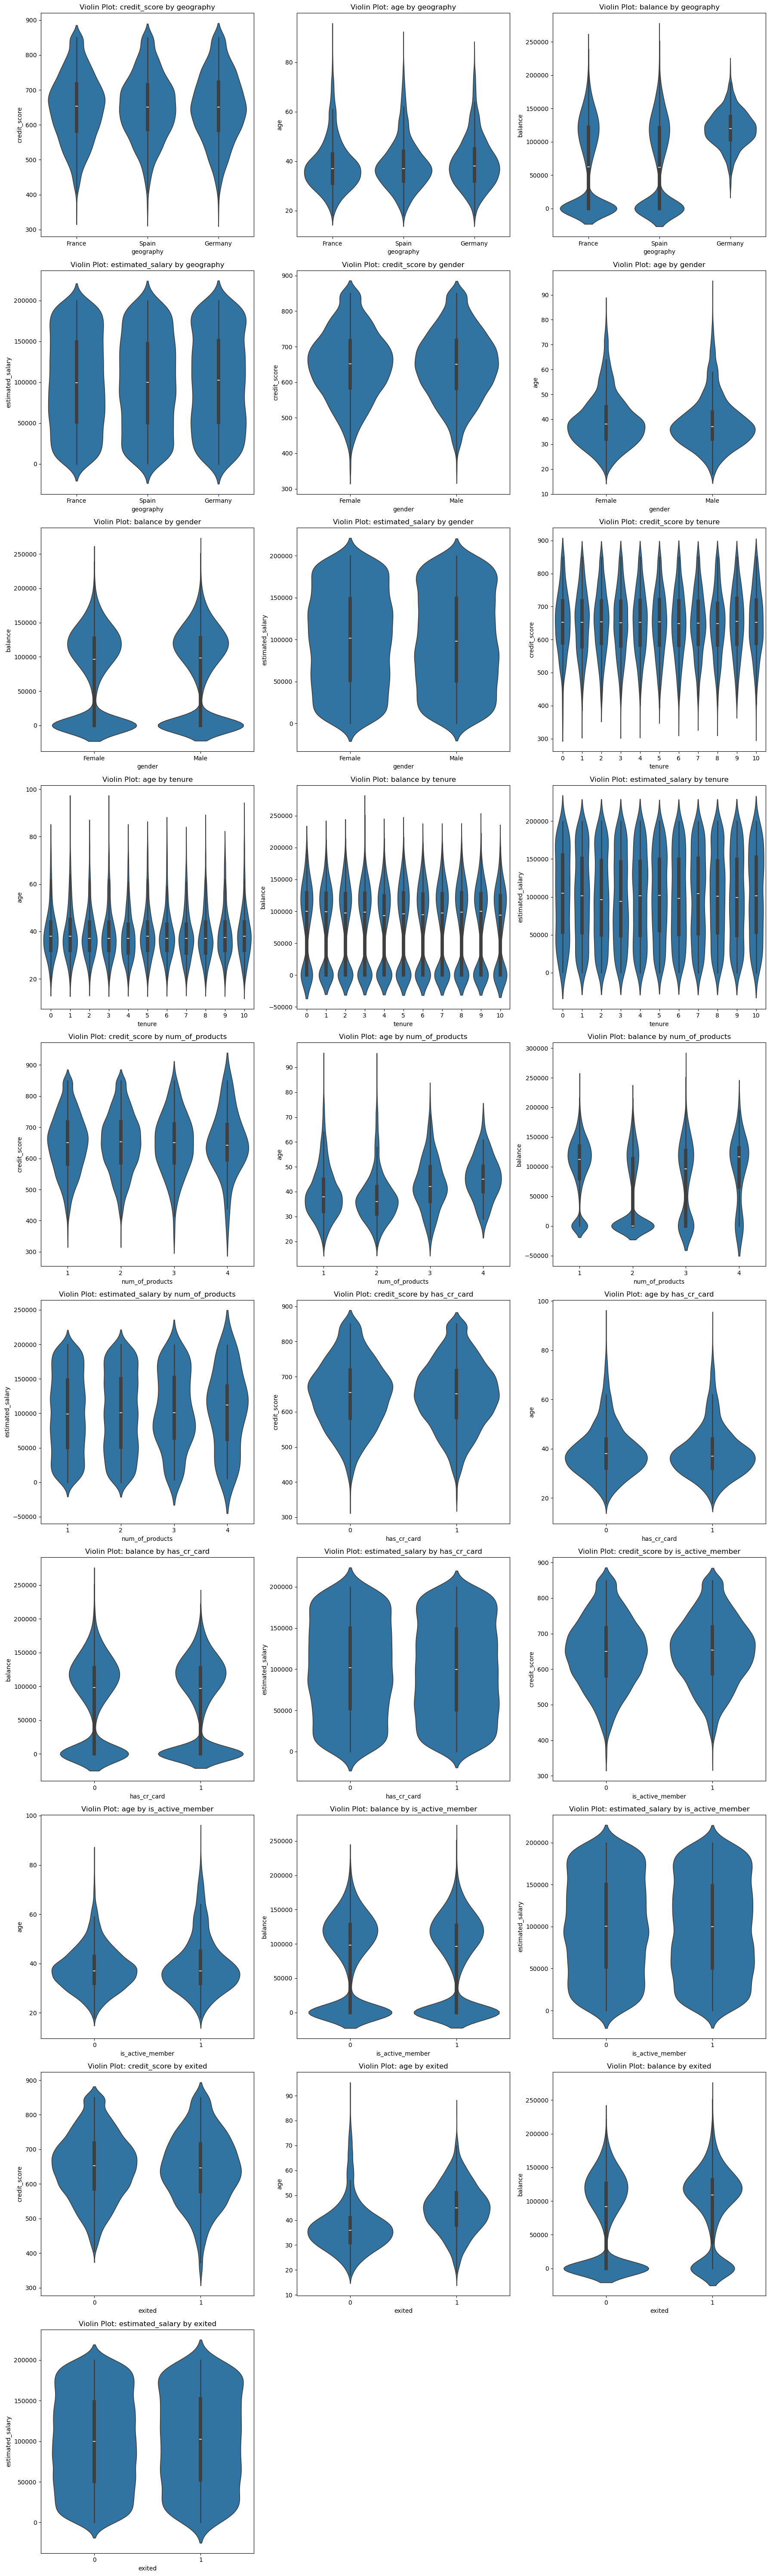

In [85]:
# 4.2.1. Violin Plots
def plot_violin_plots(df_categorical, df_numerical):
    """
    Visualizes the relationship between categorical and continuous variables using Violin Plots.

    Args:
        df_categorical (pd.DataFrame): The DataFrame containing categorical variables.
        df_numerical (pd.DataFrame): The DataFrame containing numerical variables.
    """
    num_plots = len(df_categorical.columns) * len(df_numerical.columns)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

    # Flatten the axes array to easily iterate over it, even if there's only one row
    axes = axes.flatten()

    plot_index = 0
    for cat_col in df_categorical.columns:
        for num_col in df_numerical.columns:
            sns.violinplot(x=df_categorical[cat_col], y=df_numerical[num_col], ax=axes[plot_index])
            axes[plot_index].set_title(f'Violin Plot: {num_col} by {cat_col}')
            plot_index += 1

    # Hide any unused subplots
    for i in range(plot_index, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_violin_plots(df_categorical, df_numerical)

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_25285/505570089.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_categorical[cat_col], y=df_numerical[num_col], ci=None, ax=axes[plot_index])
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_25285/505570089.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_categorical[cat_col], y=df_numerical[num_col], ci=None, ax=axes[plot_index])
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_25285/505570089.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_categorical[cat_col], y=df_numerical[num_col], ci=None, ax=axes[plot_index])
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_25285/505570089.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplo

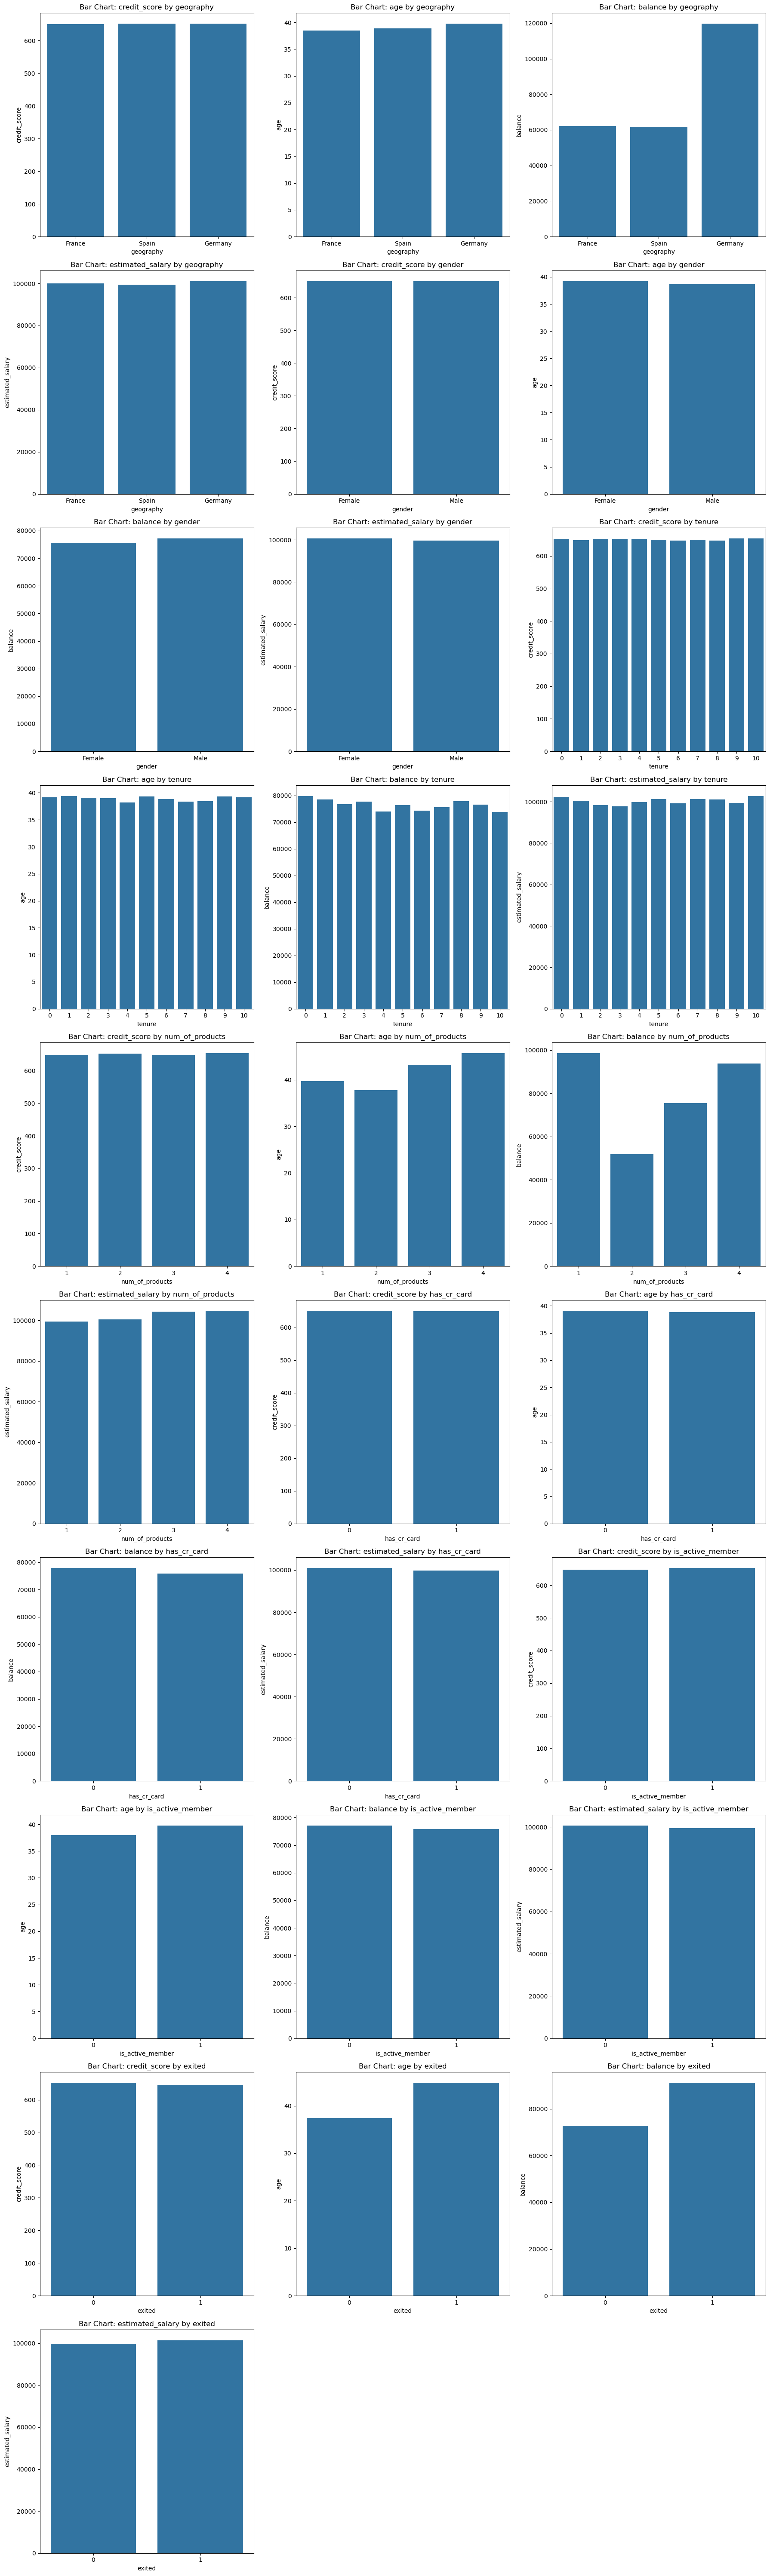

In [86]:
# 4.2.2. Bar Charts
def plot_bar_charts(df_categorical, df_numerical):
    """
    Visualizes the relationship between categorical and continuous variables using Bar Charts.

    Args:
        df_categorical (pd.DataFrame): The DataFrame containing categorical variables.
        df_numerical (pd.DataFrame): The DataFrame containing numerical variables.
    """
    num_plots = len(df_categorical.columns) * len(df_numerical.columns)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

    axes = axes.flatten()

    plot_index = 0
    for cat_col in df_categorical.columns:
        for num_col in df_numerical.columns:
            sns.barplot(x=df_categorical[cat_col], y=df_numerical[num_col], ci=None, ax=axes[plot_index])
            axes[plot_index].set_title(f'Bar Chart: {num_col} by {cat_col}')
            plot_index += 1

    for i in range(plot_index, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_bar_charts(df_categorical, df_numerical)


In [87]:
df.groupby('geography')['balance'].mean()

geography
France      62087.922586
Germany    119711.827092
Spain       61792.170436
Name: balance, dtype: float64

In [88]:
df.groupby('geography')['exited'].mean()

geography
France     0.161612
Germany    0.324701
Spain      0.166801
Name: exited, dtype: float64

<Axes: xlabel='geography', ylabel='exited'>

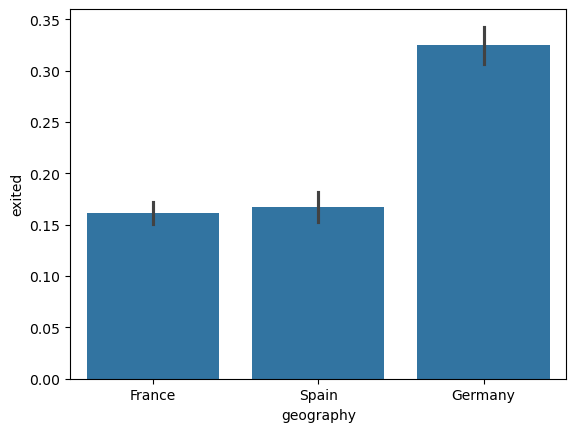

In [89]:
sns.barplot(data=df, x='geography', y='exited')

#### Inference from Violine Plots and Bar Charts
- Germany has the highest average balance among the three regions, at approximately 119,711.
- Germany also has the highest exit rate, with about 32.47% of customers having exited.
- This indicates that while customers in Germany tend to have higher average balances, a significant proportion of them have also exited the service. This could be an important insight for further analysis, potentially indicating that factors other than just account balance are influencing customer retention in Germany.

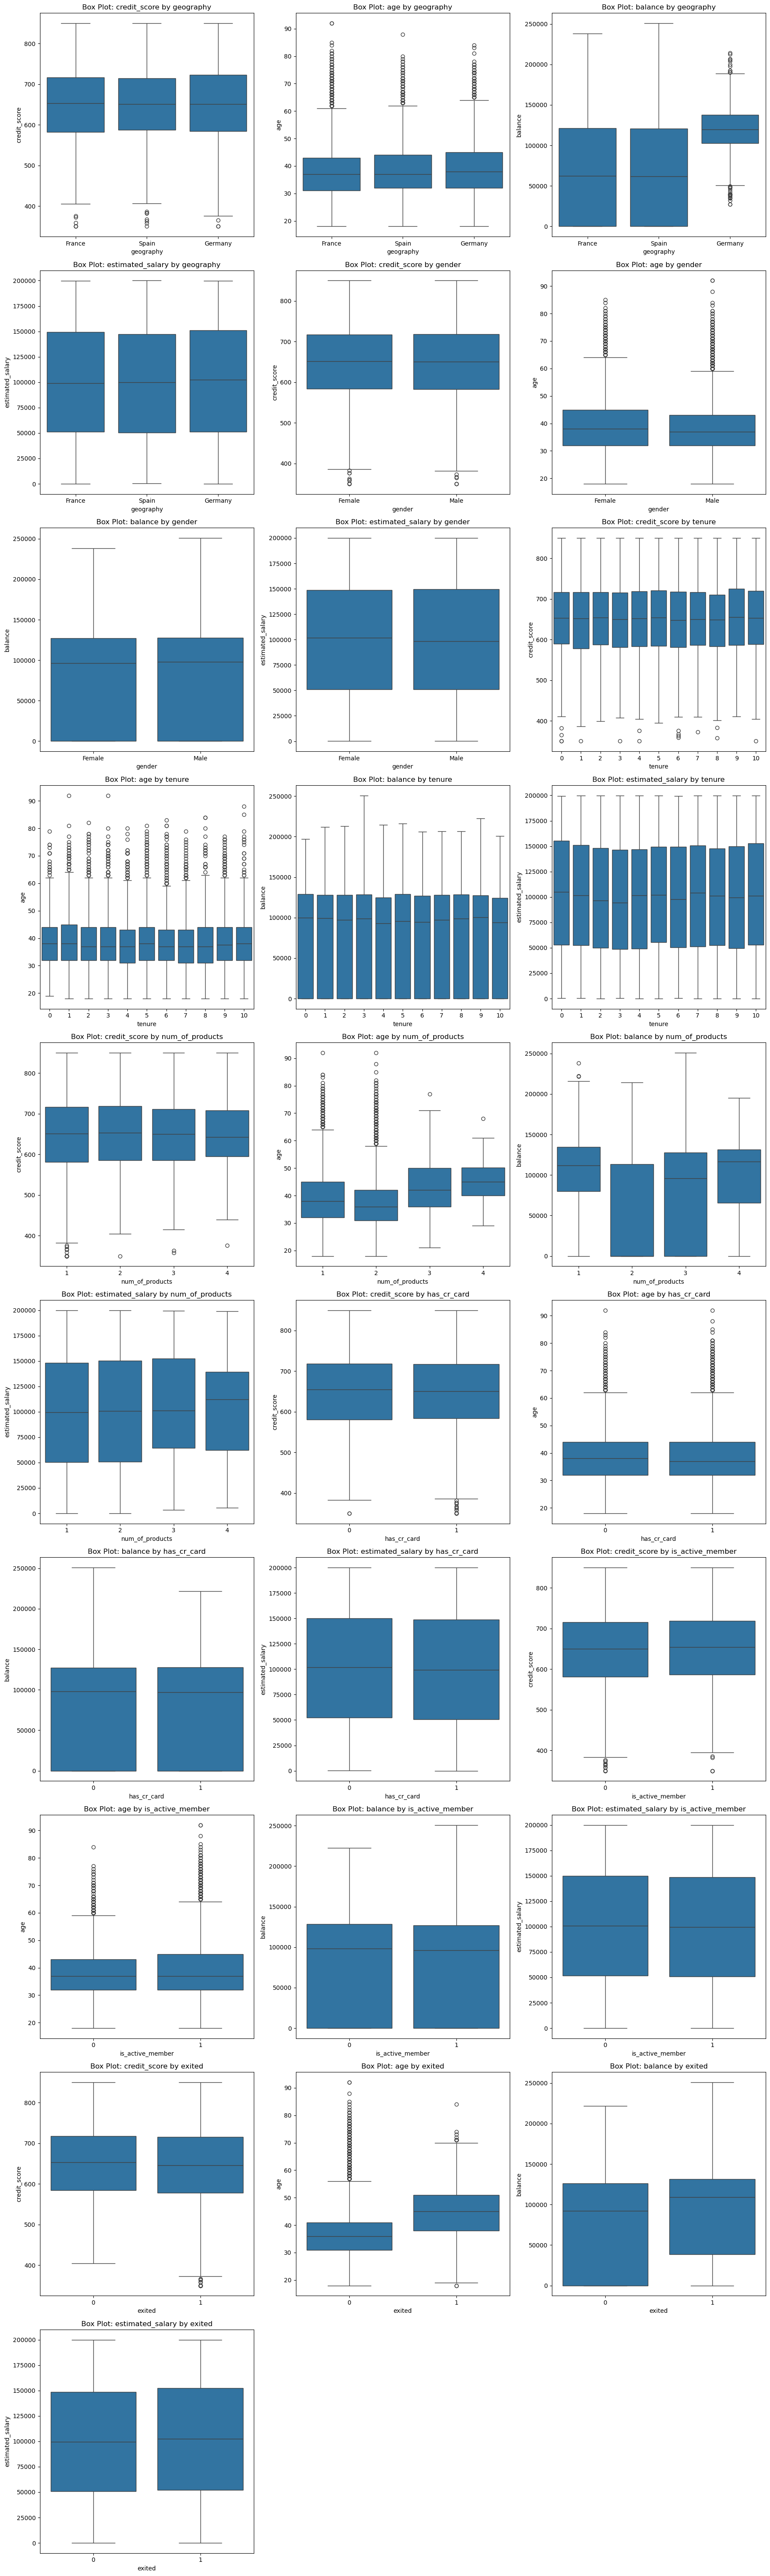

In [90]:
# 4.2.3. Side by side Box Plots
#visualize the distribution of a continuous variable across different categories. They show the median, quartiles, and potential outliers, providing a quick snapshot of the data's spread and central tendency.
def plot_box_plots(df_categorical, df_numerical):
    """
    Visualizes the relationship between categorical and continuous variables using Side-by-Side Box Plots.

    Args:
        df_categorical (pd.DataFrame): The DataFrame containing categorical variables.
        df_numerical (pd.DataFrame): The DataFrame containing numerical variables.
    """
    num_plots = len(df_categorical.columns) * len(df_numerical.columns)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

    axes = axes.flatten()

    plot_index = 0
    for cat_col in df_categorical.columns:
        for num_col in df_numerical.columns:
            sns.boxplot(x=df_categorical[cat_col], y=df_numerical[num_col], ax=axes[plot_index])
            axes[plot_index].set_title(f'Box Plot: {num_col} by {cat_col}')
            plot_index += 1

    for i in range(plot_index, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_box_plots(df_categorical, df_numerical)



#### Inference from Side by side Box Plots
Most significant relationships summarized in one line each:
- Balance by Exited: Customers with lower balances are more likely to have exited.
- Gorgraphy/ Exited (Germany)
- Age by Exited: Older customers are more likely to have exited.
- Num_of_Products by Balance: Customers with more products tend to have higher account balances.
- Age by Num_of_Products: Older customers tend to hold more products.
- Balance by Is_Active_Member: Active members generally have higher account balances

#### 4.3. Continuous vs Continuous
  - 4.3.1. Correlation coefficients
  - 4.3.2. Visualization:
    - 4.3.2.1. Scatter plots
    - 4.3.2.2. Line plots
    - 4.3.2.3. Correlation Heatmaps
    - 4.3.2.4. QQ Plot
- 4.4. Bivariate Analysis Inference. 

Pearson and Spearman correlations interpretations:
- Values close to 1 indicate a strong positive relationship.
- Values close to -1 indicate a strong negative relationship.
- Values close to 0 indicate little to no relationship.

In [91]:
# Calculating the Pearson correlation coefficients between all pairs of numerical variables

def calculate_pearson_correlations(df):
    """
    Calculate Pearson correlation for each unique pair of numerical columns in a DataFrame,
    and return the results sorted by correlation value.

    Args:
        df (pd.DataFrame): The DataFrame containing numerical variables.

    Returns:
        pd.DataFrame: A DataFrame of correlation results, sorted by the absolute value of correlation.
    """
    correlations = []

    # Iterate over each unique combination of numerical columns
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            correlation = df[col1].corr(df[col2])
            correlations.append((col1, col2, correlation))

    # Convert the list of tuples into a DataFrame
    correlation_df = pd.DataFrame(correlations, columns=['Variable 1', 'Variable 2', 'Correlation'])

    # Sort by the absolute value of correlation
    sorted_correlation_df = correlation_df.reindex(correlation_df['Correlation'].sort_values(ascending=False).index)

    return sorted_correlation_df


sorted_correlations = calculate_pearson_correlations(df_numerical)
sorted_correlations

Variable 1        Variable 2  Correlation
3           age           balance     0.028379
5       balance  estimated_salary     0.012637
1  credit_score           balance     0.006580
2  credit_score  estimated_salary    -0.001256
0  credit_score               age    -0.004235
4           age  estimated_salary    -0.006949

In [92]:
# Calculating the Spearman correlation coefficients between all pairs of numerical variables
def calculate_spearman_correlations(df):
    """
    Calculate Spearman correlation for each unique pair of numerical columns in a DataFrame,
    and return the results sorted by correlation value.

    Args:
        df (pd.DataFrame): The DataFrame containing numerical variables.

    Returns:
        pd.DataFrame: A DataFrame of correlation results, sorted by the absolute value of correlation.
    """
    correlations = []

    # Iterate over each unique combination of numerical columns
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            correlation = df[col1].corr(df[col2], method='spearman')
            correlations.append((col1, col2, correlation))

    # Convert the list of tuples into a DataFrame
    correlation_df = pd.DataFrame(correlations, columns=['Column 1', 'Column 2', 'Correlation'])

    # Sort by the absolute value of correlation
    sorted_correlation_df = correlation_df.sort_values(by='Correlation',  ascending=False)

    return sorted_correlation_df


spearman_correlations_sorted = calculate_spearman_correlations(df_numerical)
spearman_correlations_sorted

Column 1          Column 2  Correlation
3           age           balance     0.033290
5       balance  estimated_salary     0.011649
1  credit_score           balance     0.005972
2  credit_score  estimated_salary     0.001332
4           age  estimated_salary    -0.002104
0  credit_score               age    -0.008219

In [93]:
#select specific numerical cols for spearman_correlations and heatmap
df_for_spearman_and_heatmap = df[['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']]

In [94]:
# Spearman for all numerical variables (including numerical considered categorical)
def calculate_spearman_correlations(df):
    """
    Calculates Spearman correlations for all unique pairs of columns in the DataFrame, excluding self-pairs and duplicates.
    Sorts the results by the absolute value of the Spearman correlation coefficient in descending order.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        pd.DataFrame: A DataFrame containing the Spearman correlation coefficients for each unique pair of columns, sorted by the correlation values.
    """
    correlations = []

    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            correlation = df[col1].corr(df[col2], method='spearman')
            correlations.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Spearman Correlation': correlation
            })

    # Convert to DataFrame and sort by absolute value of correlation
    correlations_df = pd.DataFrame(correlations)
    correlations_df = correlations_df.sort_values(by='Spearman Correlation',  ascending=False)

    return correlations_df


spearman_correlations_sorted_for_heatmap= calculate_spearman_correlations(df_for_spearman_and_heatmap)
spearman_correlations_sorted_for_heatmap

Variable 1        Variable 2  Spearman Correlation
14               age            exited              0.324218
25           balance            exited              0.111111
12               age  is_active_member              0.039753
9                age           balance              0.033290
5       credit_score  is_active_member              0.023764
17            tenure       has_cr_card              0.022327
27   num_of_products  is_active_member              0.016304
28   num_of_products  estimated_salary              0.012771
3       credit_score   num_of_products              0.012754
16            tenure   num_of_products              0.012640
35  estimated_salary            exited              0.011966
24           balance  estimated_salary              0.011649
19            tenure  estimated_salary              0.007826
2       credit_score           balance              0.005972
26   num_of_products       has_cr_card              0.004068
6       credit_score  estimated_salary              0.001332
1       credit_score            tenure              0.001053
13               age  estimated_salary             -0.002104
4       credit_score       has_cr_card             -0.004095
32       has_cr_card            exited             -0.007023
0       credit_score               age             -0.008219
15            tenure           balance             -0.009206
22           balance       has_cr_card             -0.009654
31       has_cr_card  estimated_salary             -0.010029
8                age            tenure             -0.010532
33  is_active_member  estimated_salary             -0.011064
23           balance  is_active_member             -0.011764
30       has_cr_card  is_active_member             -0.012039
20            tenure            exited             -0.014186
11               age       has_cr_card             -0.015230
7       credit_score            exited             -0.022987
18            tenure  is_active_member             -0.028399
10               age   num_of_products             -0.058645
29   num_of_products            exited             -0.125042
34  is_active_member            exited             -0.156072
21           balance   num_of_products             -0.316693

#### Inference from Pearson's and Spearman's correlations:
- Age and Exited: Spearman's ρ = 0.324 (Moderate positive correlation)
- Balance and Exited: Spearman's ρ = 0.111 (Weak positive correlation)
- Age and Balance: Weak positive correlation (Spearman's ρ ≈ 0.033).
- Balance and Estimated Salary: Very weak positive correlation (Spearman's ρ ≈ 0.011-0.012).
- Credit Score and Balance: Very weak positive correlation (Spearman's ρ ≈ 0.006).
- Credit Score and Estimated Salary: Very weak positive correlation (Spearman's ρ ≈ 0.001).
- Credit Score and Age: Very weak negative correlation (Spearman's ρ ≈ -0.008).


#### 4.3.2. Visualization:
- 4.3.2.1. Scatter plots/ pairplot
- 4.3.2.2. Correlation Heatmaps
- 4.3.2.3. QQ Plot

In [95]:
#select specific numerical cols for pairplot
df_for_pairplot = df[['credit_score', 'age', 'balance', 'estimated_salary','exited']]

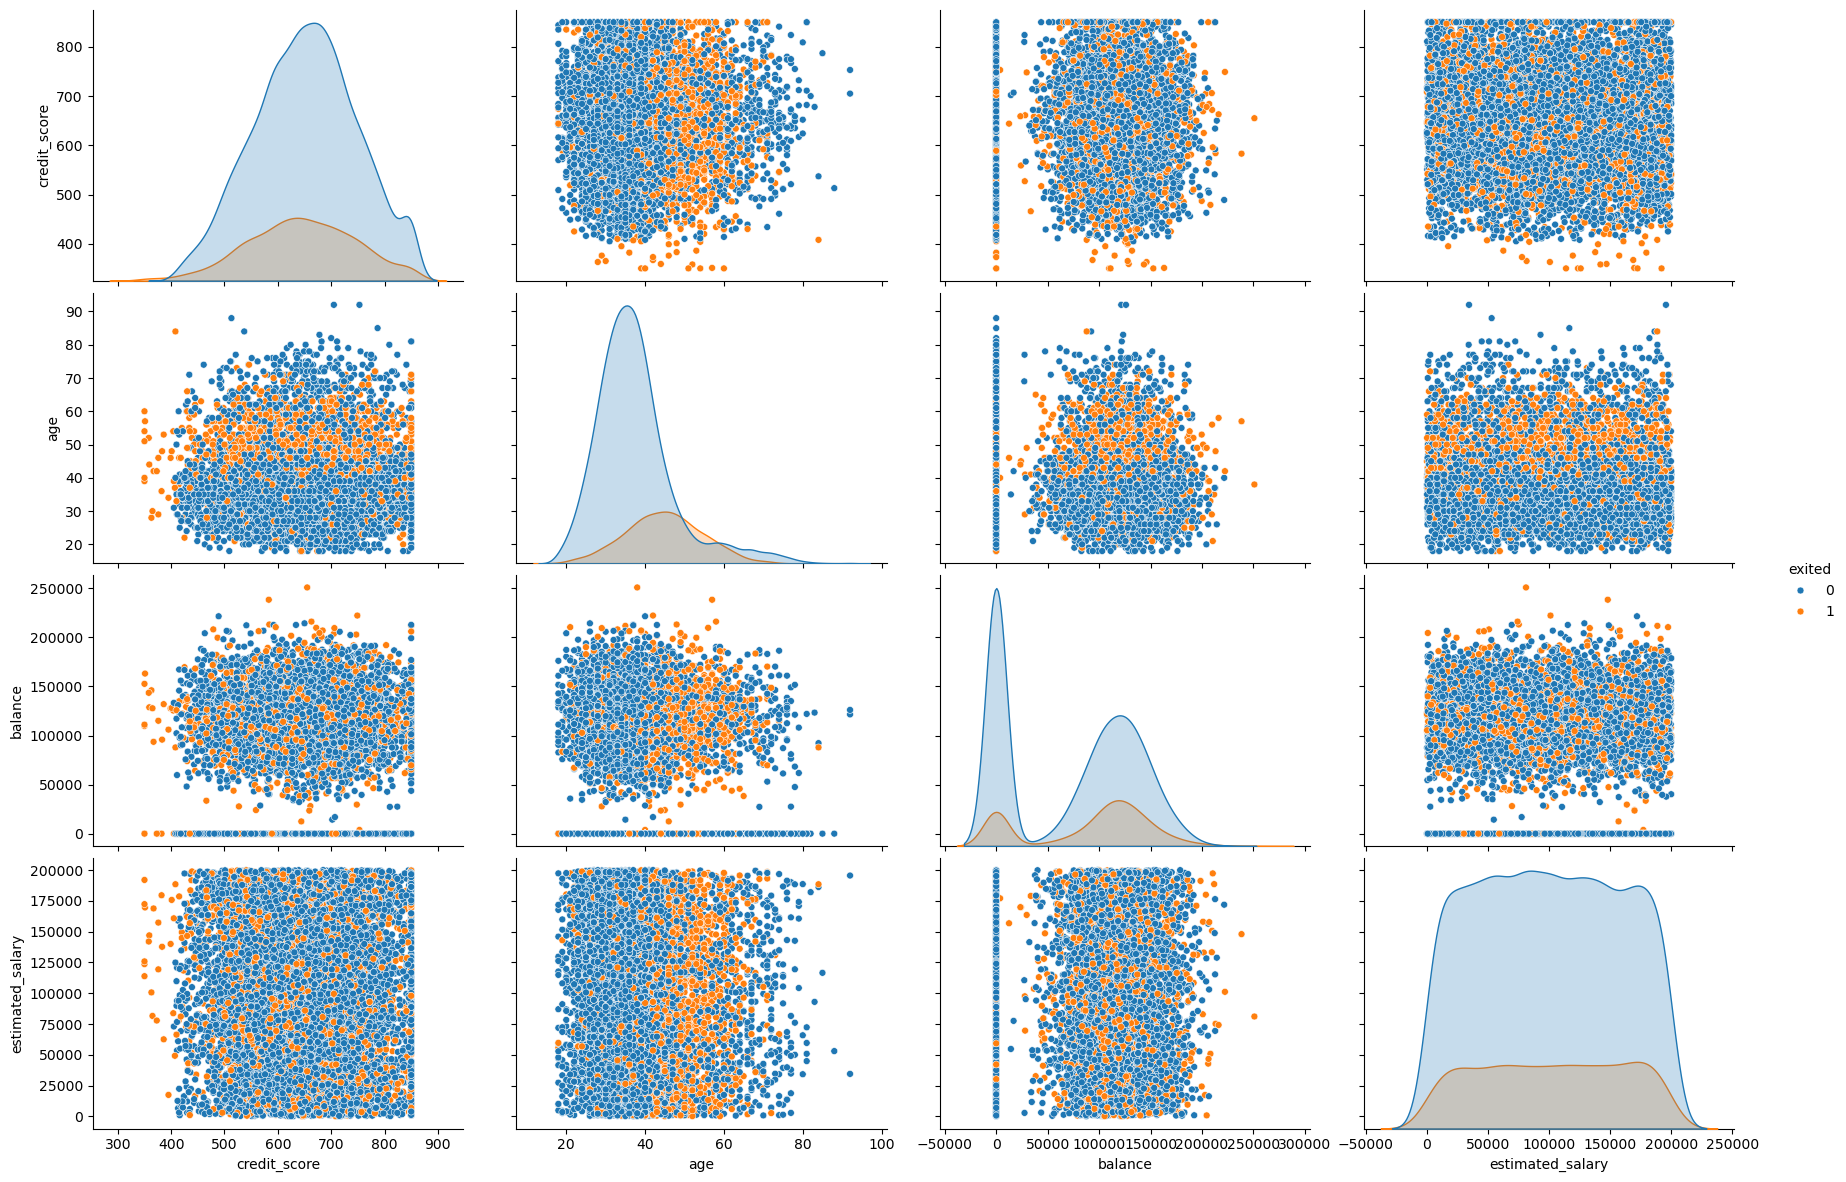

In [96]:
# 4.3.2.1. Scatter plots/ pairplot
def custom_pairplot(df, hue_col):
    """
    Creates a customized pairplot with smaller markers and larger horizontal figure size.

    Args:
        df (pd.DataFrame): The DataFrame containing the data for the pairplot.
        hue_col (str): The column name for the hue (categorical variable for color coding).
    """
    # Set up the seaborn pairplot with custom marker size and larger figure size
    sns.pairplot(df, hue=hue_col, height=3, aspect=1.5, plot_kws={'s': 25})

    # Display the plot
    plt.show()

# Example usage with your DataFrame
custom_pairplot(df_for_pairplot, 'exited')

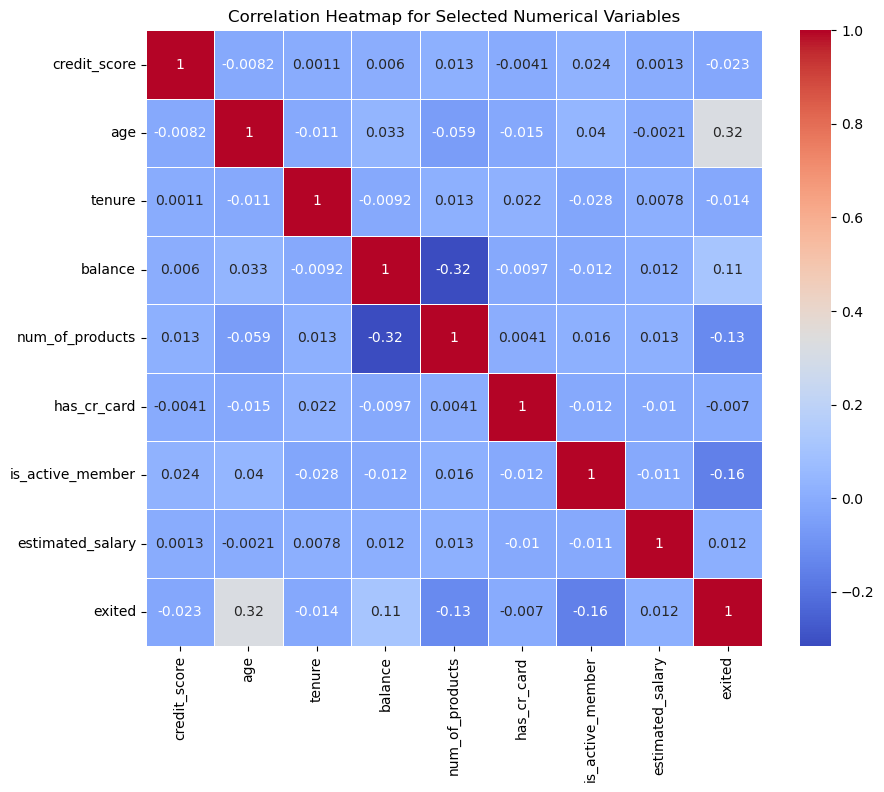

In [97]:
# 4.3.2.2. Correlation Heatmaps
def plot_sorted_spearman_heatmap(df):
    """
    Calculates Spearman correlations for all unique pairs of columns in the DataFrame,
    sorts the results, and generates a heatmap of the sorted correlation matrix.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    # Step 1: Calculate Spearman Correlations and Sort
    correlations = []
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            correlation = df[col1].corr(df[col2], method='spearman')
            correlations.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Spearman Correlation': correlation
            })

    # Convert to DataFrame and sort by absolute value of correlation
    correlations_df = pd.DataFrame(correlations)
    correlations_df = correlations_df.sort_values(by='Spearman Correlation', key=abs, ascending=False)

    # Step 2: Create a Correlation Matrix
    correlation_matrix = df.corr(method='spearman')

    # Step 3: Plot the Heatmap
    plt.figure(figsize=(10, 8))  # Adjust the size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, linewidths=.5)
    plt.title("Correlation Heatmap for Selected Numerical Variables")
    plt.show()

# Example usage
plot_sorted_spearman_heatmap(df_for_spearman_and_heatmap)

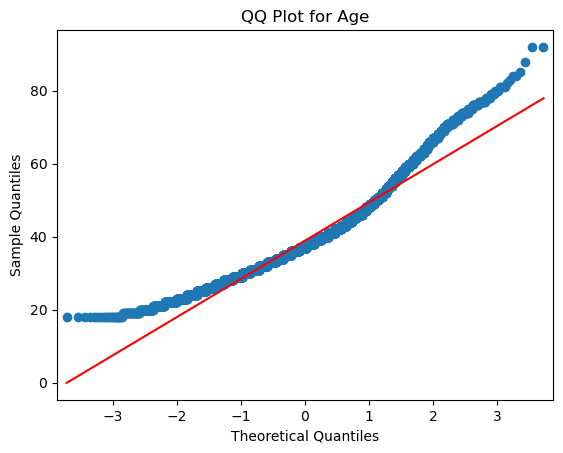

In [98]:
# 4.3.2.3. QQ Plot
sm.qqplot(df['age'], line='s')
plt.title('QQ Plot for Age')
plt.show()

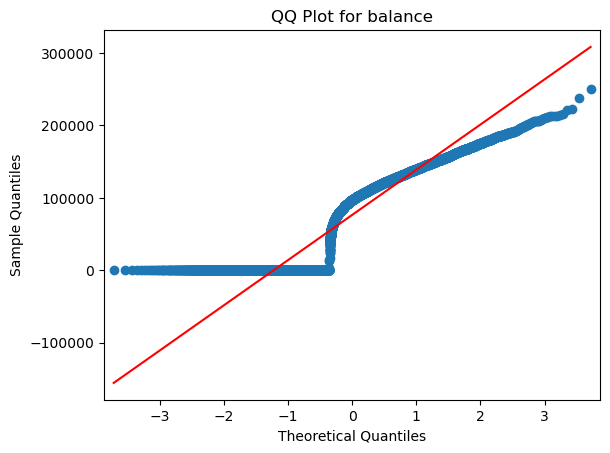

In [99]:
# 4.3.2.3. QQ Plot
sm.qqplot(df['balance'], line='s')
plt.title('QQ Plot for balance')
plt.show()

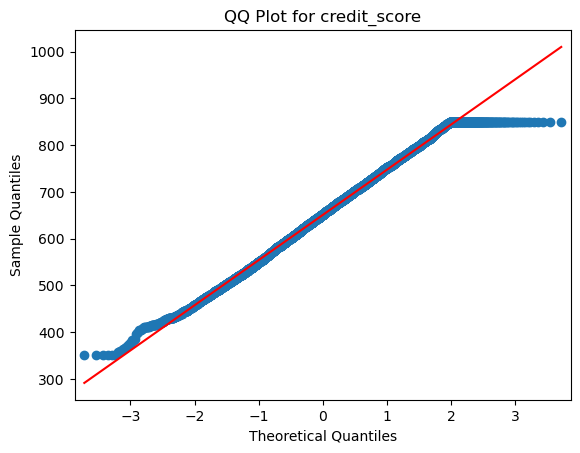

In [100]:
# 4.3.2.3. QQ Plot
sm.qqplot(df['credit_score'], line='s')
plt.title('QQ Plot for credit_score')
plt.show()

## 5. Feature Engineering 
 - 5.1. Create new features:categorization for credit score, age, tenure, balance, salary.
 - 5.2. Encode categorical variables 
 - 5.3. Check and Remove highly correlated variables:(Pearson correlation coefficient > 0.8)
 - 5.4. Assemble the final dataset (ABT)

In [101]:
df_features_engineering = df.copy()
df_features_engineering.head()

row_number  customer_id   surname  credit_score geography  gender  age  \
0           1     15634602  Hargrave           619    France  Female   42   
1           2     15647311      Hill           608     Spain  Female   41   
2           3     15619304      Onio           502    France  Female   42   
3           4     15701354      Boni           699    France  Female   39   
5           6     15574012       Chu           645     Spain    Male   44   

   tenure  balance  num_of_products  has_cr_card  is_active_member  \
0       2        0                1            1                 1   
1       1    83807                1            0                 1   
2       8   159660                3            1                 0   
3       1        0                2            0                 0   
5       8   113755                2            1                 0   

   estimated_salary  exited  
0            101348       1  
1            112542       0  
2            113931       1  
3             93826       0  
5            149756       1

In [102]:
# 5.1. Create new features:categorization for credit score
def create_features(df):
    # Binning credit score with letters
    credit_score_bins = [349, 579, 669, 739, 799, 851]
    credit_score_labels = ['E', 'D', 'C', 'B', 'A']
    df['credit_score_cat'] = pd.cut(df['credit_score'], bins=credit_score_bins, labels=credit_score_labels, right=True)

    # Categorize age into segments
    age_bins = [17, 25, 35, 45, 55, 65, np.inf]
    age_labels = ['A', 'B', 'C', 'D', 'E', 'F']
    df['age_cat'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    # Categorize tenure into segments
    tenure_bins = [-1, 3, 5, 7, np.inf]
    tenure_labels = ['A', 'B', 'C', 'D']
    df['tenure_cat'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

    # Categorize balance
    balance_bins = [-1, 50000, 90000, 127000, np.inf]
    balance_labels = ['A', 'B', 'C', 'D']
    df['balance_cat'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels)

    # Categorize estimated_salary into segments
    salary_bins = [11, 40000, 80000, 120000, 160000, 200000]
    salary_labels = ['A', 'B', 'C', 'D', 'E']
    df['salary_cat'] = pd.cut(df['estimated_salary'], bins=salary_bins, labels=salary_labels, right=False)

    # Drop unnecessary columns
    df_final = df.drop(columns=['row_number', 'customer_id','surname'], axis=1)
    
    return df_final

df_features_engineering = create_features(df_features_engineering)
df_features_engineering.head()


credit_score geography  gender  age  tenure  balance  num_of_products  \
0           619    France  Female   42       2        0                1   
1           608     Spain  Female   41       1    83807                1   
2           502    France  Female   42       8   159660                3   
3           699    France  Female   39       1        0                2   
5           645     Spain    Male   44       8   113755                2   

   has_cr_card  is_active_member  estimated_salary  exited credit_score_cat  \
0            1                 1            101348       1                D   
1            0                 1            112542       0                D   
2            1                 0            113931       1                E   
3            0                 0             93826       0                C   
5            1                 0            149756       1                D   

  age_cat tenure_cat balance_cat salary_cat  
0       C          A           A          C  
1       C          A           B          C  
2       C          D           D          C  
3       C          A           A          C  
5       C          D           C          D

In [103]:
# 5.1. Encode non-ordinal categorical variables with one_hot_encoder
def one_hot_encoder(df, drop_first=True):
    categorical_cols = ['geography']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return df

df_features_engineering = one_hot_encoder(df_features_engineering)
df_features_engineering.head()

credit_score  gender  age  tenure  balance  num_of_products  has_cr_card  \
0           619  Female   42       2        0                1            1   
1           608  Female   41       1    83807                1            0   
2           502  Female   42       8   159660                3            1   
3           699  Female   39       1        0                2            0   
5           645    Male   44       8   113755                2            1   

   is_active_member  estimated_salary  exited credit_score_cat age_cat  \
0                 1            101348       1                D       C   
1                 1            112542       0                D       C   
2                 0            113931       1                E       C   
3                 0             93826       0                C       C   
5                 0            149756       1                D       C   

  tenure_cat balance_cat salary_cat  geography_Germany  geography_Spain  
0          A           A          C                  0                0  
1          A           B          C                  0                1  
2          D           D          C                  0                0  
3          A           A          C                  0                0  
5          D           C          D                  0                1

In [104]:
# 5.2. Encode ordinal categorical variables with ordinal encoder
def ordinal_encoder(df):
    categorical_cols = ['credit_score_cat', 'age_cat', 'tenure_cat', 'balance_cat', 'salary_cat']
    
    # Initialize the OrdinalEncoder
    encoder = OrdinalEncoder()
    
    # Apply the OrdinalEncoder to the specified columns
    df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
    # Convert the encoded values to integers
    df[categorical_cols] = df[categorical_cols].astype(int)
    
    return df

# Assuming df_new_features is your original DataFrame
df_features_engineering = ordinal_encoder(df_features_engineering)
df_features_engineering.head()


credit_score  gender  age  tenure  balance  num_of_products  has_cr_card  \
0           619  Female   42       2        0                1            1   
1           608  Female   41       1    83807                1            0   
2           502  Female   42       8   159660                3            1   
3           699  Female   39       1        0                2            0   
5           645    Male   44       8   113755                2            1   

   is_active_member  estimated_salary  exited  credit_score_cat  age_cat  \
0                 1            101348       1                 3        2   
1                 1            112542       0                 3        2   
2                 0            113931       1                 4        2   
3                 0             93826       0                 2        2   
5                 0            149756       1                 3        2   

   tenure_cat  balance_cat  salary_cat  geography_Germany  geography_Spain  
0           0            0           2                  0                0  
1           0            1           2                  0                1  
2           3            3           2                  0                0  
3           0            0           2                  0                0  
5           3            2           3                  0                1

In [105]:
# 5.3. Encode binary non-ordinal categorical variables with label_encoder
def label_encoder(df, info=False):
    binary_cols = ['gender', 'has_cr_card', 'is_active_member', 'exited']
    labelencoder = LabelEncoder()
    
    for col in binary_cols:
        df[col] = labelencoder.fit_transform(df[col])
        if info:
            d1, d2 = labelencoder.inverse_transform([0, 1])
            print(f'{col}\n0:{d1}, 1:{d2}')
    
    return df

df_features_engineering= label_encoder(df_features_engineering, info=True)
df_features_engineering.head()

gender
0:Female, 1:Male
has_cr_card
0:0, 1:1
is_active_member
0:0, 1:1
exited
0:0, 1:1


credit_score  gender  age  tenure  balance  num_of_products  has_cr_card  \
0           619       0   42       2        0                1            1   
1           608       0   41       1    83807                1            0   
2           502       0   42       8   159660                3            1   
3           699       0   39       1        0                2            0   
5           645       1   44       8   113755                2            1   

   is_active_member  estimated_salary  exited  credit_score_cat  age_cat  \
0                 1            101348       1                 3        2   
1                 1            112542       0                 3        2   
2                 0            113931       1                 4        2   
3                 0             93826       0                 2        2   
5                 0            149756       1                 3        2   

   tenure_cat  balance_cat  salary_cat  geography_Germany  geography_Spain  
0           0            0           2                  0                0  
1           0            1           2                  0                1  
2           3            3           2                  0                0  
3           0            0           2                  0                0  
5           3            2           3                  0                1

In [106]:
# 5.4. Assemble final dataset
df_final = df_features_engineering.drop(columns=['credit_score', 'age','tenure','balance','estimated_salary'])
df_final.nunique()

gender               2
num_of_products      4
has_cr_card          2
is_active_member     2
exited               2
credit_score_cat     5
age_cat              6
tenure_cat           4
balance_cat          4
salary_cat           5
geography_Germany    2
geography_Spain      2
dtype: int64

## 6. Model Building 
- 6.1. Feature selection
- 6.2. Data Splitting into training and testing sets
- 6.3. Define futures importance
- 6.4. Build and evaluate 5 Models No-Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network 
- 6.5. Hyperparametres tuning for 5 Models No-Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network 
- 6.6. Build and evaluate 5 Models With Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network
- 6.7. Hyperparameters Tuning 5 Models with Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network
- 6.8. Plot ROC AUC curve

In [107]:
# 6.1. Feature selection
features = df_final[['gender', 'num_of_products', 'has_cr_card', 'is_active_member', 'credit_score_cat', 'age_cat', 'tenure_cat', 'balance_cat','salary_cat','geography_Germany', 'geography_Spain']]
target = df_final['exited']

In [108]:
# 6.2. Data Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

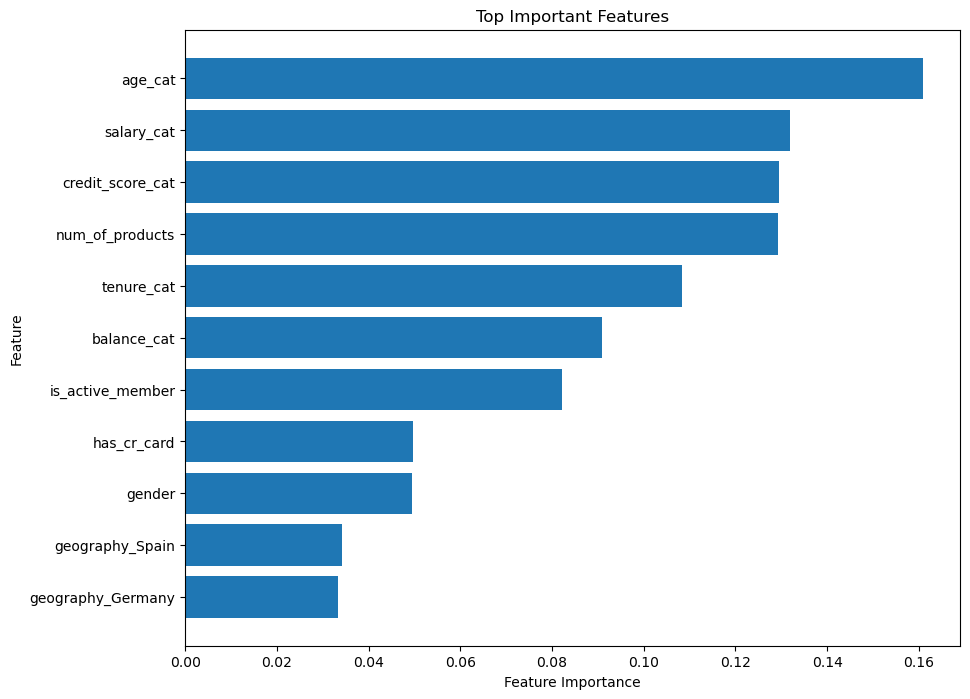

In [109]:
# 6.3. Define features importance
def plot_feature_importance(X_train, y_train, n_estimators=100, random_state=42):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf.fit(X_train, y_train)
    importances = rf.feature_importances_
    features = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df_sorted['Feature'], feature_importance_df_sorted['Importance'])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Top Important Features")
    plt.gca().invert_yaxis()  # To have the highest importance at the top
    plt.show()
    return feature_importance_df_sorted

feature_importance_df_sorted = plot_feature_importance(X_train, y_train, n_estimators=100, random_state=42)

In [110]:
# 6.4. Build and evaluate 5 Models No-Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network 
def evaluate_models(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42):
    cv_results = []
    test_results = []
    folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)

    # Define models with default parameters
    models = {
        'CatBoost': CatBoostClassifier(random_seed=RAND_VAL, logging_level='Silent'),
        'Random Forest': RandomForestClassifier(random_state=RAND_VAL),
        'XGBoost': XGBClassifier(random_state=RAND_VAL),
        'LightGBM': LGBMClassifier(random_state=RAND_VAL),
        'Neural Network': MLPClassifier(random_state=RAND_VAL, max_iter=2000)  # Increased max_iter to avoid warnings
    }

    # Iterate through each model
    for model_name, model in models.items():
        # Perform cross-validation
        fold_results = []
        for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
            X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
            X_val_fold, y_val_fold = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

            if model_name == 'CatBoost':
                train_pool = Pool(X_train_fold, y_train_fold)
                val_pool = Pool(X_val_fold, y_val_fold)
                model.fit(train_pool, eval_set=val_pool)
            else:
                model.fit(X_train_fold, y_train_fold)

            y_pred_val = model.predict(X_val_fold)
            y_pred_val_proba = model.predict_proba(X_val_fold)[:, 1] if hasattr(model, "predict_proba") else y_pred_val

            # Calculate metrics for validation set
            accuracy = accuracy_score(y_val_fold, y_pred_val)
            precision = precision_score(y_val_fold, y_pred_val)
            recall = recall_score(y_val_fold, y_pred_val)
            f1 = f1_score(y_val_fold, y_pred_val)
            auc = roc_auc_score(y_val_fold, y_pred_val_proba)

            fold_results.append({
                'Model': model_name, 
                'Fold': n_fold,
                'CV Accuracy': accuracy,
                'CV Precision': precision,
                'CV Recall': recall,
                'CV F1 Score': f1,
                'CV AUC': auc
            })

        # Convert fold results to DataFrame and exclude 'Model' column when calculating the mean
        fold_results_df = pd.DataFrame(fold_results)
        cv_results_avg = fold_results_df.mean(numeric_only=True).to_dict()
        cv_results_avg['Model'] = model_name  # Add model name to results
        cv_results.append(cv_results_avg)

        # Evaluate on test set after training on full training data
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_test_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_test_pred

        # Calculate test set metrics
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_pred_proba)

        test_results.append({
            'Model': model_name, 
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Test AUC': test_auc
        })

    # Convert cross-validation results to DataFrame and sort
    cv_results_df = pd.DataFrame(cv_results).sort_values(by=["CV Accuracy", "CV F1 Score", "CV Precision", "CV Recall", "CV AUC"], ascending=[False, False, False, False, False])

    # Convert test set results to DataFrame and sort
    test_results_df = pd.DataFrame(test_results).sort_values(by=["Test Accuracy", "Test F1 Score", "Test Precision", "Test Recall", "Test AUC"], ascending=[False, False, False, False, False])

    print("----------------")
    print(cv_results_df)
    print("\nTest set evaluation:")
    print(test_results_df)

    # Find and display the best performing fold and test set performance
    best_model_cv = cv_results_df.iloc[0]
    best_model_test = test_results_df.iloc[0]
    print("\nBest performing model on cross-validation:")
    print(best_model_cv)
    print("\nBest performing model on test set:")
    print(best_model_test)

    # Optional: Save results to CSV
    cv_results_df.to_csv('model_comparison_results_folds.csv', index=False)
    test_results_df.to_csv('model_comparison_results_test.csv', index=False)

    return test_results_df, cv_results_df

test_results_df, cv_results_df = evaluate_models(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42)

----------------
   Fold  CV Accuracy  CV Precision  CV Recall  CV F1 Score    CV AUC  \
0   2.0     0.861715      0.779415   0.437267     0.560049  0.856841   
3   2.0     0.856714      0.725604   0.465839     0.567118  0.846414   
4   2.0     0.854713      0.706278   0.478261     0.569984  0.841704   
2   2.0     0.846711      0.670940   0.469565     0.552225  0.824175   
1   2.0     0.843337      0.655852   0.467702     0.545904  0.813868   

            Model  
0        CatBoost  
3        LightGBM  
4  Neural Network  
2         XGBoost  
1   Random Forest  

Test set evaluation:
            Model  Test Accuracy  Test Precision  Test Recall  Test F1 Score  \
3        LightGBM         0.8460        0.730769     0.443925       0.552326   
0        CatBoost         0.8425        0.716475     0.436916       0.542816   
4  Neural Network         0.8410        0.690972     0.464953       0.555866   
1   Random Forest         0.8350        0.671329     0.448598       0.537815   
2       

**Best performing model on cross-validation:**
- Fold: 2.0
- CV Accuracy: 0.861715
- CV Precision: 0.779415
- CV Recall: 0.437267
- CV F1 Score: 0.560049
- CV AUC: 0.856841
- Model: CatBoost

**Best performing model on test set:**
- Model: LightGBM
- Test Accuracy: 0.846
- Test Precision: 0.730769
- Test Recall: 0.443925
- Test F1 Score: 0.552326
- Test AUC: 0.865342

In [111]:
# 6.5 Hyperparametres tuning for 5 Models No-Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network 
def tune_and_evaluate_models(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42):
    cv_results = []
    test_results = []
    folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)

    # Define reduced parameter grids for hyperparameter tuning
    param_grids = {
        'CatBoost': {
            'learning_rate': [0.01, 0.02],
            'depth': [6, 8],
            'iterations': [500, 1000],
            'l2_leaf_reg': [3, 5]
        },
        'Random Forest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'XGBoost': {
            'n_estimators': [500, 1000],
            'max_depth': [6, 8],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        },
        'LightGBM': {
            'n_estimators': [500, 1000],
            'max_depth': [10, 20],
            'learning_rate': [0.01, 0.05],
            'num_leaves': [31, 64],
            'subsample': [0.8, 1.0]
        },
        'Neural Network': {
            'hidden_layer_sizes': [(100,), (150, 100)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'alpha': [0.0001, 0.001],
            'learning_rate': ['adaptive'],
            'max_iter': [2000, 3000]  
        }
    }

    # Define models with default parameters
    models = {
        'CatBoost': CatBoostClassifier(random_seed=RAND_VAL, logging_level='Silent'),
        'Random Forest': RandomForestClassifier(random_state=RAND_VAL),
        'XGBoost': XGBClassifier(random_state=RAND_VAL),
        'LightGBM': LGBMClassifier(random_state=RAND_VAL),
        'Neural Network': MLPClassifier(random_state=RAND_VAL)
    }

    # Iterate through each model
    for model_name, model in models.items():
        print(f"Tuning {model_name}...")

        # RandomizedSearchCV to find the best hyperparameters
        randomized_search = RandomizedSearchCV(
            estimator=model, 
            param_distributions=param_grids[model_name], 
            n_iter=10,  # Limit the number of parameter combinations to try
            cv=folds, 
            scoring='roc_auc', 
            n_jobs=-1, 
            verbose=1,
            random_state=RAND_VAL
        )
        randomized_search.fit(X_train, y_train)
        best_model = randomized_search.best_estimator_

        # Store cross-validation results
        best_cv_score = randomized_search.best_score_

        # Evaluate on test set after training on full training data
        best_model.fit(X_train, y_train)
        y_test_pred = best_model.predict(X_test)
        y_test_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else y_test_pred

        # Calculate test set metrics
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_pred_proba)

        # Append results
        cv_results.append({
            'Model': model_name,
            'Best CV AUC': best_cv_score,
            'Best Parameters': randomized_search.best_params_
        })
        test_results.append({
            'Model': model_name, 
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Test AUC': test_auc
        })

    # Convert cross-validation results to DataFrame and sort
    cv_results_df = pd.DataFrame(cv_results).sort_values(by=["Best CV AUC"], ascending=[False])

    # Convert test set results to DataFrame and sort
    test_results_df = pd.DataFrame(test_results).sort_values(by=["Test Accuracy", "Test F1 Score", "Test Precision", "Test Recall", "Test AUC"], ascending=[False, False, False, False, False])

    print("----------------")
    print(cv_results_df)
    print("\nTest set evaluation:")
    print(test_results_df)

    # Find and display the best performing model on CV and test set
    best_model_cv = cv_results_df.iloc[0]
    best_model_test = test_results_df.iloc[0]
    print("\nBest performing model on cross-validation:")
    print(best_model_cv)
    print("\nBest performing model on test set:")
    print(best_model_test)

    # Optional: Save results to CSV
    cv_results_df.to_csv('tuned_model_comparison_results_folds.csv', index=False)
    test_results_df.to_csv('tuned_model_comparison_results_test.csv', index=False)

    return test_results_df, cv_results_df

test_results_df, cv_results_df = tune_and_evaluate_models(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42)

Tuning CatBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning Neural Network...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------------
            Model  Best CV AUC  \
0        CatBoost     0.858543   
2         XGBoost     0.855048   
3        LightGBM     0.853477   
1   Random Forest     0.849774   
4  Neural Network     0.843536   

                                     Best Parameters  
0  {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'ite...  
2  {'subsample': 0.8, 'n_estimators': 500, 'max_d...  
3  {'subsample': 0.8, 'num_leaves': 31, 'n_estima...  
1  {'n_estimators': 200, 'min_samples_split': 5, ...  
4  {'solver': 'adam', 'max_iter': 3000, 'learning...  

Test set evaluation:
            Mode

**Results after tuning no-resampling Best performing model on test set:**
- Model: CatBoost
- Test Accuracy: 0.8495
- Test Precision: 0.782222
- Test Recall: 0.411215
- Test F1 Score: 0.539051
- Test AUC: 0.865856

In [112]:
# 6.6. 5 Models With Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network
def evaluate_models_resampling(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42):
    cv_results = []
    test_results = []
    folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)

    # Resampling strategies
    resampling_strategies = {
        'Original': (X_train, y_train),
        'Undersampling': RandomUnderSampler(random_state=RAND_VAL).fit_resample(X_train, y_train),
        'Oversampling': RandomOverSampler(random_state=RAND_VAL).fit_resample(X_train, y_train),
        'SMOTE': SMOTE(random_state=RAND_VAL).fit_resample(X_train, y_train)
    }

    # Define models with default parameters
    models = {
        'CatBoost': CatBoostClassifier(random_seed=RAND_VAL, logging_level='Silent'),
        'Random Forest': RandomForestClassifier(random_state=RAND_VAL),
        'XGBoost': XGBClassifier(random_state=RAND_VAL),
        'LightGBM': LGBMClassifier(random_state=RAND_VAL),
        'Neural Network': MLPClassifier(random_state=RAND_VAL, max_iter=2000)  # Increased max_iter to avoid warnings
    }

    # Iterate through each resampling strategy
    for strategy_name, (X_resampled, y_resampled) in resampling_strategies.items():
        print(f"Evaluating with {strategy_name} resampling...")

        # Iterate through each model
        for model_name, model in models.items():
            print(f"Training {model_name} with {strategy_name} resampling...")

            # Perform cross-validation
            fold_results = []
            for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_resampled, y_resampled)):
                X_train_fold, y_train_fold = X_resampled.iloc[train_idx], y_resampled.iloc[train_idx]
                X_val_fold, y_val_fold = X_resampled.iloc[valid_idx], y_resampled.iloc[valid_idx]

                if model_name == 'CatBoost':
                    train_pool = Pool(X_train_fold, y_train_fold)
                    val_pool = Pool(X_val_fold, y_val_fold)
                    model.fit(train_pool, eval_set=val_pool)
                else:
                    model.fit(X_train_fold, y_train_fold)

                y_pred_val = model.predict(X_val_fold)
                y_pred_val_proba = model.predict_proba(X_val_fold)[:, 1] if hasattr(model, "predict_proba") else y_pred_val

                # Calculate metrics for validation set
                accuracy = accuracy_score(y_val_fold, y_pred_val)
                precision = precision_score(y_val_fold, y_pred_val)
                recall = recall_score(y_val_fold, y_pred_val)
                f1 = f1_score(y_val_fold, y_pred_val)
                auc = roc_auc_score(y_val_fold, y_pred_val_proba)

                fold_results.append({
                    'Resampling Strategy': strategy_name,
                    'Model': model_name, 
                    'Fold': n_fold,
                    'CV Accuracy': accuracy,
                    'CV Precision': precision,
                    'CV Recall': recall,
                    'CV F1 Score': f1,
                    'CV AUC': auc
                })

            # Convert fold results to DataFrame and exclude 'Model' column when calculating the mean
            fold_results_df = pd.DataFrame(fold_results)
            cv_results_avg = fold_results_df.mean(numeric_only=True).to_dict()
            cv_results_avg['Model'] = model_name  # Add model name to results
            cv_results_avg['Resampling Strategy'] = strategy_name  # Add resampling strategy to results
            cv_results.append(cv_results_avg)

            # Evaluate on test set after training on full training data
            model.fit(X_resampled, y_resampled)
            y_test_pred = model.predict(X_test)
            y_test_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_test_pred

            # Calculate test set metrics
            test_accuracy = accuracy_score(y_test, y_test_pred)
            test_precision = precision_score(y_test, y_test_pred)
            test_recall = recall_score(y_test, y_test_pred)
            test_f1 = f1_score(y_test, y_test_pred)
            test_auc = roc_auc_score(y_test, y_test_pred_proba)

            test_results.append({
                'Resampling Strategy': strategy_name,
                'Model': model_name, 
                'Test Accuracy': test_accuracy,
                'Test Precision': test_precision,
                'Test Recall': test_recall,
                'Test F1 Score': test_f1,
                'Test AUC': test_auc
            })

    # Convert cross-validation results to DataFrame and sort
    cv_results_df = pd.DataFrame(cv_results).sort_values(by=["CV Accuracy", "CV F1 Score", "CV Precision", "CV Recall", "CV AUC"], ascending=[False, False, False, False, False])

    # Convert test set results to DataFrame and sort
    test_results_df = pd.DataFrame(test_results).sort_values(by=["Test Accuracy", "Test F1 Score", "Test Precision", "Test Recall", "Test AUC"], ascending=[False, False, False, False, False])

    print("----------------")
    print(cv_results_df)
    print("\nTest set evaluation:")
    print(test_results_df)

    # Find and display the best performing fold and test set performance
    best_model_cv = cv_results_df.iloc[0]
    best_model_test = test_results_df.iloc[0]
    print("\nBest performing model on cross-validation:")
    print(best_model_cv)
    print("\nBest performing model on test set:")
    print(best_model_test)

    # Optional: Save results to CSV
    cv_results_df.to_csv('model_comparison_results_folds.csv', index=False)
    test_results_df.to_csv('model_comparison_results_test.csv', index=False)

    return test_results_df, cv_results_df

test_results_df, cv_results_df = evaluate_models_resampling(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42)

Evaluating with Original resampling...
Training CatBoost with Original resampling...
Training Random Forest with Original resampling...
Training XGBoost with Original resampling...
Training LightGBM with Original resampling...
Training Neural Network with Original resampling...
Evaluating with Undersampling resampling...
Training CatBoost with Undersampling resampling...
Training Random Forest with Undersampling resampling...
Training XGBoost with Undersampling resampling...
Training LightGBM with Undersampling resampling...
Training Neural Network with Undersampling resampling...
Evaluating with Oversampling resampling...
Training CatBoost with Oversampling resampling...
Training Random Forest with Oversampling resampling...
Training XGBoost with Oversampling resampling...
Training LightGBM with Oversampling resampling...
Training Neural Network with Oversampling resampling...
Evaluating with SMOTE resampling...
Training CatBoost with SMOTE resampling...
Training Random Forest with SM

**Results after Resampling Best performing model on cross-validation:**
- Fold: 2.0
- CV Accuracy: 0.925486
- CV Precision: 0.891806
- CV Recall: 0.968534
- CV F1 Score: 0.928573
- CV AUC: 0.975634
- Model: Random Forest
- Resampling Strategy: Oversampling

**Best performing model on test set:**
- Resampling Strategy: Original
- Model: LightGBM
- Test Accuracy: 0.846
- Test Precision: 0.730769
- Test Recall: 0.443925
- Test F1 Score: 0.552326
- Test AUC: 0.865342

In [113]:
# 6.7. Hyperparameters Tuning 5 Models with Resampling: CatBoost, Random Forest, XGBoost, LightGBM, Neural Network
def tune_and_evaluate_models_resampling(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42):
    cv_results = []
    test_results = []
    best_models = {}  # Dictionary to store the best models
    folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)

    # Resampling strategies
    resampling_strategies = {
        'Original': (X_train, y_train),
        'Undersampling': RandomUnderSampler(random_state=RAND_VAL).fit_resample(X_train, y_train),
        'Oversampling': RandomOverSampler(random_state=RAND_VAL).fit_resample(X_train, y_train),
        'SMOTE': SMOTE(random_state=RAND_VAL).fit_resample(X_train, y_train)
    }

    # Compute class weights
    class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
    class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

    # Define parameter grids for hyperparameter tuning
    param_grids = {
        'CatBoost': {
            'learning_rate': [0.01, 0.02],
            'depth': [6, 8],
            'iterations': [500, 1000],
            'l2_leaf_reg': [3, 5],
            'class_weights': [class_weights_dict]  # Manually set class weights
        },
        'Random Forest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'class_weight': ['balanced']  # Adding class weights
        },
        'XGBoost': {
            'n_estimators': [500, 1000],
            'max_depth': [6, 8],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'scale_pos_weight': [class_weights_dict[0] / class_weights_dict[1]]  # Set based on class distribution
        },
        'LightGBM': {
            'n_estimators': [500, 1000],
            'max_depth': [10, 20],
            'learning_rate': [0.01, 0.05],
            'num_leaves': [31, 64],
            'subsample': [0.8, 1.0],
            'class_weight': ['balanced']  # Adding class weights
        },
        'Neural Network': {
            'hidden_layer_sizes': [(50,), (100,)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'alpha': [0.0001, 0.001],
            'learning_rate': ['adaptive'],
            'max_iter': [1000, 1500],  # Reduced max_iter to avoid long training times
            'early_stopping': [True]  # Early stopping to reduce time
        }
    }

    # Define models with default parameters
    models = {
        'CatBoost': CatBoostClassifier(random_seed=RAND_VAL, logging_level='Silent'),
        'Random Forest': RandomForestClassifier(random_state=RAND_VAL),
        'XGBoost': XGBClassifier(random_state=RAND_VAL),
        'LightGBM': LGBMClassifier(random_state=RAND_VAL),
        'Neural Network': MLPClassifier(random_state=RAND_VAL)
    }

    # Iterate through each resampling strategy
    for strategy_name, (X_resampled, y_resampled) in resampling_strategies.items():
        print(f"Evaluating with {strategy_name} resampling...")

        # Iterate through each model
        for model_name, model in models.items():
            print(f"Tuning {model_name} with {strategy_name} resampling...")

            # Perform hyperparameter tuning using RandomizedSearchCV
            randomized_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grids[model_name],
                n_iter=5,  # Reduced number of parameter combinations to try for faster tuning
                cv=folds,
                scoring='recall',  # Change scoring to recall to improve recall metric
                n_jobs=-1,
                verbose=1,
                random_state=RAND_VAL
            )
            randomized_search.fit(X_resampled, y_resampled)
            best_model = randomized_search.best_estimator_

            # Store cross-validation results
            best_cv_score = randomized_search.best_score_

            # Store the best model for future use
            best_models[(model_name, strategy_name)] = best_model

            # Evaluate on test set after training on full training data
            best_model.fit(X_resampled, y_resampled)
            y_test_pred = best_model.predict(X_test)
            y_test_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else y_test_pred

            # Calculate test set metrics
            test_accuracy = accuracy_score(y_test, y_test_pred)
            test_precision = precision_score(y_test, y_test_pred)
            test_recall = recall_score(y_test, y_test_pred)
            test_f1 = f1_score(y_test, y_test_pred)
            test_auc = roc_auc_score(y_test, y_test_pred_proba)

            # Append results
            cv_results.append({
                'Resampling Strategy': strategy_name,
                'Model': model_name,
                'Best CV Recall': best_cv_score,
                'Best Parameters': randomized_search.best_params_
            })
            test_results.append({
                'Resampling Strategy': strategy_name,
                'Model': model_name,
                'Test Accuracy': test_accuracy,
                'Test Precision': test_precision,
                'Test Recall': test_recall,
                'Test F1 Score': test_f1,
                'Test AUC': test_auc
            })

    # Convert cross-validation results to DataFrame and sort
    cv_results_df = pd.DataFrame(cv_results).sort_values(by=["Best CV Recall"], ascending=[False])

    # Convert test set results to DataFrame and sort
    test_results_df = pd.DataFrame(test_results).sort_values(by=["Test Accuracy", "Test F1 Score", "Test Precision", "Test Recall", "Test AUC"], ascending=[False, False, False, False, False])

    print("----------------")
    print(cv_results_df)
    print("\nTest set evaluation:")
    print(test_results_df)

    # Find and display the best performing model on CV and test set
    best_model_cv = cv_results_df.iloc[0]
    best_model_test = test_results_df.iloc[0]
    print("\nBest performing model on cross-validation:")
    print(best_model_cv)
    print("\nBest performing model on test set:")
    print(best_model_test)

    # Optional: Save results to CSV
    cv_results_df.to_csv('tuned_model_comparison_results_folds.csv', index=False)
    test_results_df.to_csv('tuned_model_comparison_results_test.csv', index=False)

    return test_results_df, cv_results_df, best_models

test_results_df, cv_results_df, best_models = tune_and_evaluate_models_resampling(X_train, X_test, y_train, y_test, num_folds=5, RAND_VAL=42)

Evaluating with Original resampling...
Tuning CatBoost with Original resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning Random Forest with Original resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning XGBoost with Original resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning LightGBM with Original resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning Neural Network with Original resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Evaluating with Undersampling resampling...
Tuning CatBoost with Undersampling resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning Random Forest with Undersampling resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning XGBoost with Undersampling resampling...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning LightGBM with Undersampling resampling...
Fitting

**Results After ReSampling and Tuning Best performing model on test set:**
- Resampling Strategy: Original
- Model: Random Forest
- Test Accuracy: 0.8355
- Test Precision: 0.609272
- Test Recall: 0.64486
- Test F1 Score: 0.626561
- Test AUC: 0.859508


<Figure size 1000x800 with 0 Axes>

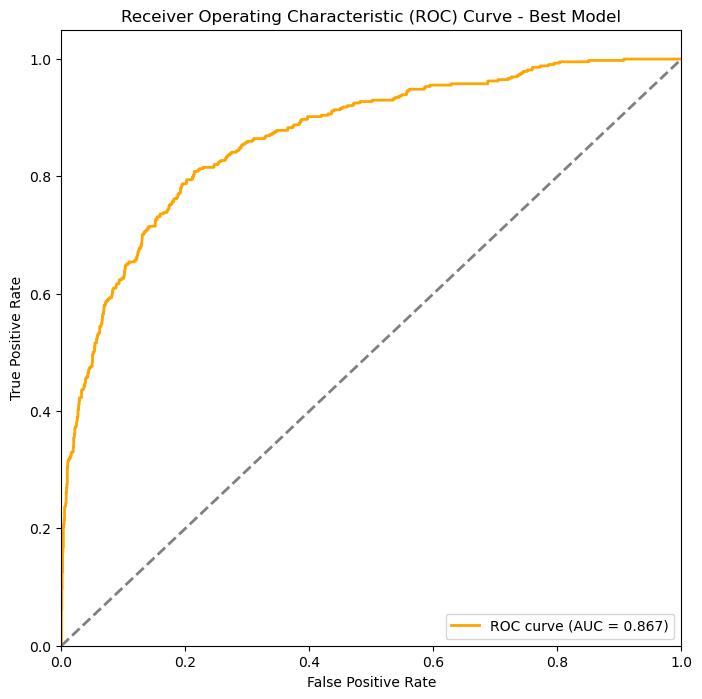

In [114]:
# 6.8. Plot ROC AUC curve:
def plot_roc_curve_for_best_model(best_models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    # Extract the best model (assuming it's the first one in the dictionary)
    best_model_info = list(best_models.items())[0]
    (model_name, strategy_name), model = best_model_info

    # Predict probabilities
    y_test_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, lw=2, color='orange', label=f'ROC curve (AUC = {roc_auc:.3f})')

    # Plot the diagonal line (no skill classifier)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Best Model')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve_for_best_model(best_models, X_test, y_test)

#### 6.9. Save and Verify the Trained Model

In [117]:
# Saving the best model (let's assume it's the Random Forest)
best_model = best_models[('Random Forest', 'Original')]  # Adjust based on your best model

# Step 4: Save the trained model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully!")

# Step 5: Read the model back
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

# Step 6: Verify the loaded model works
original_prediction = best_model.predict(X_test)
loaded_prediction = loaded_model.predict(X_test)

print("Original model accuracy:", best_model.score(X_test, y_test))
print("Loaded model accuracy:", loaded_model.score(X_test, y_test))

if np.array_equal(original_prediction, loaded_prediction):
    print("The loaded model produces the same predictions as the original model.")
else:
    print("Something went wrong. The predictions don't match.")


Model saved successfully!
Model loaded successfully!
Original model accuracy: 0.8355
Loaded model accuracy: 0.8355
The loaded model produces the same predictions as the original model.
